<a href="https://colab.research.google.com/github/isiaqraheem/big_data/blob/main/big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UK TRAFFIC ACCIDENT 20019 DATA

Importing the dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv
import numpy as np
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import datetime as dt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Road Safety Data- Vehicles 2019.csv to Road Safety Data- Vehicles 2019 (1).csv
Saving Road Safety Data - Casualties 2019.csv to Road Safety Data - Casualties 2019 (1).csv
Saving Road Safety Data - Accidents 2019.csv to Road Safety Data - Accidents 2019 (1).csv


Loading The Data

In [ ]:
#Accident Data
Accident_df = pd.read_csv('Road Safety Data - Accidents 2019.csv',dtype={'Accident_Index':str,'LSOA_of_Accident_Location':str})
Accident_df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [ ]:
print("Number of rows present in accident dataset    :{}".format(Accident_df.shape[0]))
print("Number of columns present in accident dataset :{}".format(Accident_df.shape[1]))

Number of rows present in accident dataset    :117536
Number of columns present in accident dataset :32


In [ ]:
Casualties_df = pd.read_csv('Road Safety Data - Casualties 2019.csv',dtype={'Accident_Index':str})
Casualties_df.head()


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


In [ ]:
print("Number of rows present in casualties dataset    :{}".format(Casualties_df.shape[0]))
print("Number of columns present in casualties dataset :{}".format(Casualties_df.shape[1]))

Number of rows present in casualties dataset    :153158
Number of columns present in casualties dataset :16


In [ ]:
Vehicles_df = pd.read_csv('Road Safety Data- Vehicles 2019.csv',dtype={'Accident_Index':str})
Vehicles_df.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4


In [ ]:
print("Number of rows present in vehicle dataset    :{}".format(Vehicles_df.shape[0]))
print("Number of columns present in vehicle dataset :{}".format(Vehicles_df.shape[1]))

Number of rows present in vehicle dataset    :216381
Number of columns present in vehicle dataset :23


In [ ]:
Accident_df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [ ]:
Casualties_df.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

In [ ]:
Vehicles_df.isnull().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

We need to clean the accident dataframe

In [ ]:
def clean_accident(df):
  Accident_df['Location_Easting_OSGR'] =Accident_df['Location_Easting_OSGR'].fillna(method = 'ffill')
  Accident_df['Location_Northing_OSGR'] =Accident_df['Location_Northing_OSGR'].fillna(method = 'ffill')
  Accident_df['Longitude'] =Accident_df['Longitude'].fillna(0)
  Accident_df['Latitude'] =Accident_df['Latitude'].fillna(0)
  Accident_df['Time'] =Accident_df['Time'].fillna(0)
  Accident_df['LSOA_of_Accident_Location'] =Accident_df['LSOA_of_Accident_Location'].fillna(0)
  return df


In [ ]:
Accident_df = Accident_df. apply(lambda x :clean_accident(x))  # cleaning Accident dataframe 

In [ ]:
Accident_df['Date'] = pd.to_datetime(Accident_df['Date'])
Accident_df['Time'] = pd.to_datetime(Accident_df['Time'])
Accident_df['Hour'] = Accident_df['Time'].dt.hour
Accident_df['Hour'] = Accident_df['Hour'].astype('int')
Accident_df['Month'] = Accident_df['Date'].dt.month 
Accident_df['Decimal_time'] =Accident_df['Time'].dt.hour + ( Accident_df['Time'].dt.minute)/60
    

In [ ]:
Accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               117536 non-null  object        
 1   Location_Easting_OSGR                        117536 non-null  float64       
 2   Location_Northing_OSGR                       117536 non-null  float64       
 3   Longitude                                    117536 non-null  float64       
 4   Latitude                                     117536 non-null  float64       
 5   Police_Force                                 117536 non-null  int64         
 6   Accident_Severity                            117536 non-null  int64         
 7   Number_of_Vehicles                           117536 non-null  int64         
 8   Number_of_Casualties                         117536 non-null  in

#A: Time of Accident

Histogram of hours of the day in which Accident occurs

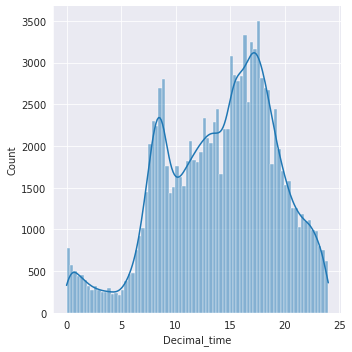

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')
sns.displot(data=Accident_df,x=Accident_df['Decimal_time'],kde=True)
plt.show()

I am defining a new column that groups time that accident happened into 5 groups 
Morning Rush- from 5am to 10am --> value 1
Office Hours -from 10am to 3pm (or: 10:00 - 15:00) --> value 2
Afternoon Rush -from 3pm to 7pm (or: 15:00 - 19:00) --> value 3
Evening from -7pm to 11pm (or: 19:00 - 23:00) --> value 4
Night from -11pm to 5am (or: 23:00 - 05:00) --> value 5

In [ ]:
# A function to determine when accident happens
def when_it_happens(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [ ]:
Accident_df['Daytime'] = Accident_df['Hour'].apply(when_it_happens)


In [ ]:
# create a look up dictionary for the group 
daytime_groups = {1: 'Morning (5-10)', 
                  2: 'Office Hours (10-15)', 
                  3: 'Afternoon Rush (15-19)', 
                  4: 'Evening (19-23)', 
                  5: 'Night(23-5)'}

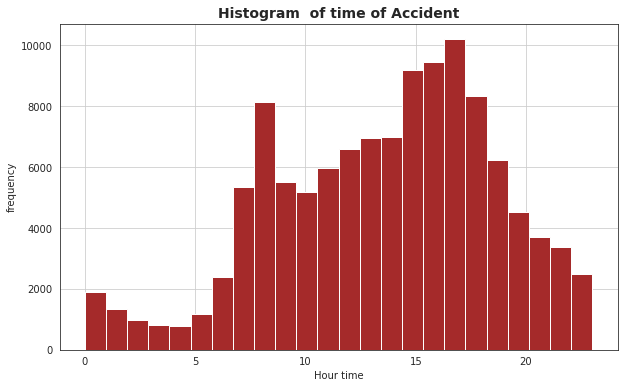

In [ ]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))
Accident_df.Hour.hist(bins=24, ax=ax, color='brown')
ax.set_title('Histogram  of time of Accident', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour time', ylabel='frequency')
plt.show()


Further analysis of Accident by time of day to differentiate weekend from weekdays using line charts

In [ ]:
# grouping accident casualties into hours 
accidents_by_weeknum = Accident_df.groupby(['Day_of_Week']).sum()['Number_of_Casualties'].to_frame().reset_index()
accidents_by_date = Accident_df.groupby(['Date', 
                                        'Day_of_Week', 
                                        'Month']).sum()['Number_of_Casualties'].to_frame().reset_index()
accidents_by_hour = Accident_df.groupby(['Day_of_Week',
                                        'Hour']).sum()['Number_of_Casualties'].to_frame().reset_index()
accidents_by_hour_pivot = accidents_by_hour.pivot_table(values=['Number_of_Casualties'], 
                                                        index=['Hour'], 
                                                        columns=['Day_of_Week'])
accidents_by_hour_pivot.columns = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']


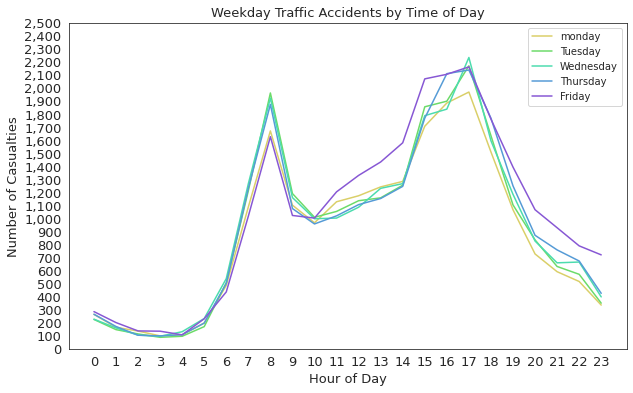

In [ ]:
# Create line charts showing trends in the Time of Day and Number of Casualties 
# Set x_axis
x_axis = accidents_by_hour_pivot.index

# Plot each weekday and assigning color to be consistent with previous charts
plt.figure(figsize=(10,6))
plt.plot(x_axis, accidents_by_hour_pivot['Monday'], color='#DACF68')
plt.plot(x_axis, accidents_by_hour_pivot['Tuesday'], color='#6CDB69')
plt.plot(x_axis, accidents_by_hour_pivot['Wednesday'], color='#4CDCAE')
plt.plot(x_axis, accidents_by_hour_pivot['Thursday'], color='#559BD6')
plt.plot(x_axis, accidents_by_hour_pivot['Friday'], color='#8757D4')

# Determine y-axis
y_max = 2500
step = 100
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)
plt.xlabel('Hour of Day', fontsize=13)
plt.ylabel('Number of Casualties', fontsize=13)

plt.legend(['monday','Tuesday','Wednesday','Thursday','Friday'])
plt.title("Weekday Traffic Accidents by Time of Day", fontsize=13)
plt.show()

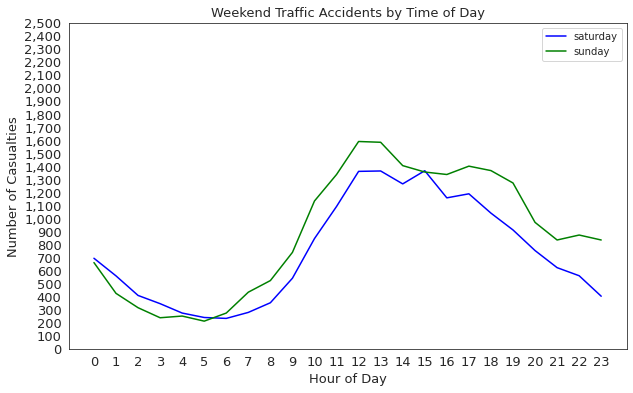

In [ ]:
# Plot for Weekends (Saturday and sunday)

plt.figure(figsize=(10,6))
plt.plot(accidents_by_hour_pivot['Sunday'], color='BLUE')
plt.plot(accidents_by_hour_pivot['Saturday'], color='GREEN')

# Determine y-axis
y_max = 2500
step = 100
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)
plt.xlabel('Hour of Day', fontsize=13)
plt.ylabel('Number of Casualties', fontsize=13)

plt.legend(['saturday','sunday'])
plt.title("Weekend Traffic Accidents by Time of Day", fontsize=13)
plt.show()


As it would have expected , the number of casulaties during the weekdays peaked at the working hours between 8AM and 5PM while during the weekend, the number of casualties only peaked at around 12.00PM when people goes out and falls afterwards

plotting  time of accident based on time band created

[Text(0, 0.5, 'grouped time'), Text(0.5, 0, 'frequency ')]

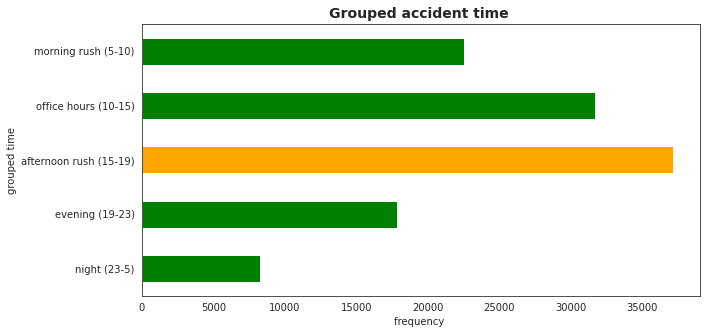

In [ ]:
# plotting  time of accident based on time band created  
order = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
Accident_sub = Accident_df.groupby('Daytime').size().reindex(order)


fig, ax = plt.subplots(figsize=(10, 5))
colors = ['green', 'green', 'orange', 'green', 'green']
Accident_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('Grouped accident time ', fontsize=14, fontweight='bold')
ax.set(xlabel='frequency ', ylabel='grouped time')

plotting the gouped accident time based on accident severity

In [ ]:
# plotting the gouped accident time based on accident severity
counts = Accident_df.groupby(['Daytime', 'Accident_Severity']).size()

counts = counts.rename_axis(['Daytime', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')

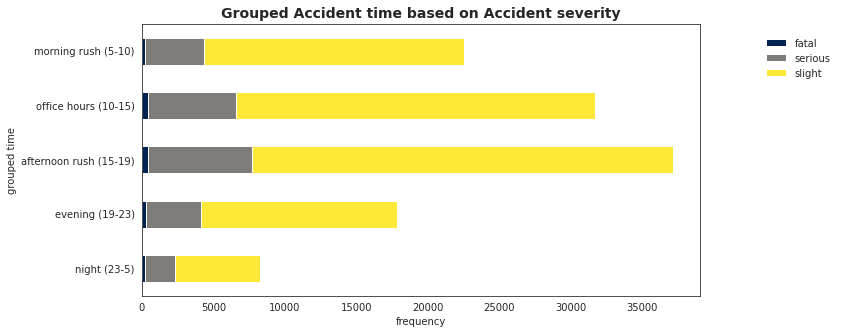

In [ ]:
# prepare barplot
fig, ax = plt.subplots(figsize=(10, 5))

# plot
counts.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('Grouped Accident time based on Accident severity', fontsize=14, fontweight='bold')
ax.set(xlabel='frequency', ylabel='grouped time')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)


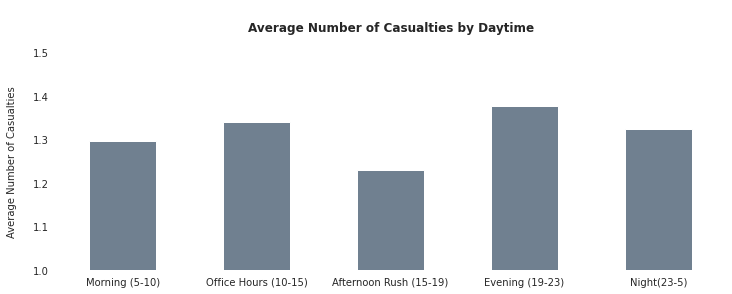

In [ ]:
 #defininig labels by accessing look up dictionary above
labels = tuple(daytime_groups.values())

# plot average no. of casualties by daytime
Accident_df.groupby('Daytime')['Number_of_Casualties'].mean().plot(kind='bar', color='slategrey', 
                                                                 figsize=(12,4), grid=False)
plt.xticks(np.arange(5), labels, rotation='horizontal')
plt.ylim((1,1.5))
plt.xlabel(''), plt.ylabel('Average Number of Casualties\n')
plt.title('\nAverage Number of Casualties by Daytime\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

countplot of day of the week when accident occurs

In [ ]:
Accident_df['Day_of_Week'].value_counts()  # This will be used to order the plot

6    19056
5    17973
4    17775
3    17598
2    16643
7    15556
1    12935
Name: Day_of_Week, dtype: int64

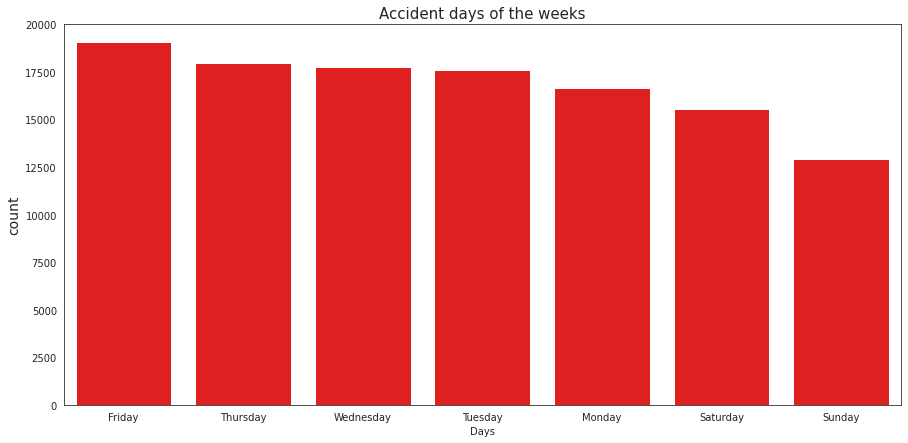

In [ ]:
%matplotlib inline
plt.figure(figsize=(15,7))
ax = sns.countplot(data=Accident_df,x=Accident_df['Day_of_Week'], order = Accident_df['Day_of_Week'].value_counts().index, color = 'RED')
ax.set_xticklabels(['Friday','Thursday','Wednesday','Tuesday','Monday','Saturday','Sunday'])                   
plt.title('Accident days of the weeks',fontsize=15)
plt.xlabel('Days')
plt.ylabel("count", fontsize = 14)
plt.show()

Plot boxplot showing average number of casualties by day of week

In [ ]:
accidents_by_date = Accident_df.groupby(['Date', 
                                        'Day_of_Week', 
                                        'Month']).sum()['Number_of_Casualties'].to_frame().reset_index()

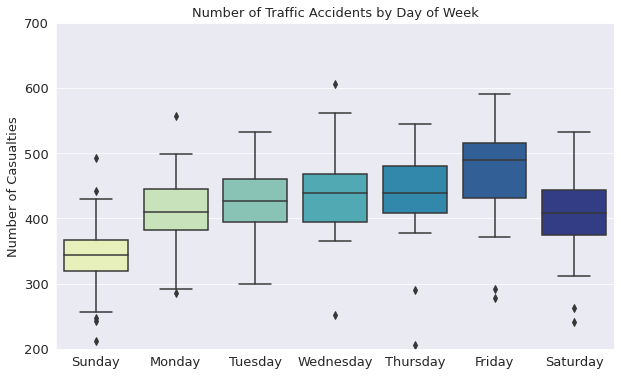

In [ ]:

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.boxplot(x='Day_of_Week', y='Number_of_Casualties', data=accidents_by_date, 
            palette = "YlGnBu")

# Define x_axis for xticks
x_axis = np.arange(0,7,1)

# Calculate upper bound of y-axis
y_max = 700
step = 100
y_axis = np.arange(200, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]

plt.ylim(min(y_axis), max(y_axis))

#plt.tick_params(axis='y', which='major', direction='out', length=2, color='gray')
plt.xticks(x_axis, ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)

plt.xlabel('')
plt.ylabel('Number of Casualties', fontsize=13)

plt.title('Number of Traffic Accidents by Day of Week', fontsize=13)
plt.show()


Month of the year that accident happen most

In [ ]:
Accident_df['month_of_the_year'] = Accident_df['Date'].dt.month 
Accident_df['days_of_the_year'] = Accident_df['Date'].dt.day 

In [ ]:
print(Accident_df[['Date','month_of_the_year','days_of_the_year']].head())

        Date  month_of_the_year  days_of_the_year
0 2019-02-18                  2                18
1 2019-01-15                  1                15
2 2019-01-01                  1                 1
3 2019-01-01                  1                 1
4 2019-01-01                  1                 1


In [ ]:
Accident_df['month_of_the_year'].value_counts()

11    10663
9     10157
7     10021
10    10005
5      9998
1      9881
8      9872
6      9657
3      9479
12     9377
4      9314
2      9112
Name: month_of_the_year, dtype: int64

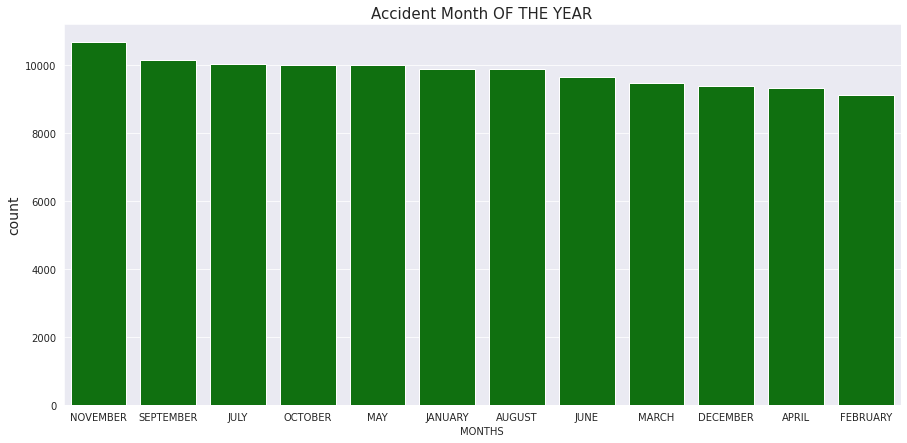

In [ ]:

%matplotlib inline
plt.figure(figsize=(15,7))
ax = sns.countplot(data=Accident_df,x=Accident_df['month_of_the_year'], order = Accident_df['month_of_the_year'].value_counts().index, color = 'GREEN')
ax.set_xticklabels(['NOVEMBER','SEPTEMBER','JULY','OCTOBER','MAY','JANUARY','AUGUST','JUNE','MARCH','DECEMBER','APRIL','FEBRUARY'])                   
plt.title('Accident Month OF THE YEAR',fontsize=15)
plt.xlabel('MONTHS')
plt.ylabel("count", fontsize = 14)
plt.show()

#B: Accidents involving motorbikes

In [ ]:
def concat_bike(df):
    bike1=Vehicles_df[Vehicles_df["Vehicle_Type"]==2]
    bike2=Vehicles_df[Vehicles_df["Vehicle_Type"]==3]
    bike3=Vehicles_df[Vehicles_df["Vehicle_Type"]==4]
    bike4=Vehicles_df[Vehicles_df["Vehicle_Type"]==5]
    bike5=Vehicles_df[Vehicles_df["Vehicle_Type"]==23]
    bike6=Vehicles_df[Vehicles_df["Vehicle_Type"]==97]
    Total_Motorbike =pd.concat([bike1, bike2, bike3, bike4,bike5,bike6], ignore_index=True)

    return Total_Motorbike

In [ ]:
Total_Motorbike_df= concat_bike(Vehicles_df)

In [ ]:

# Merging Accdient dataframe to motorbike dataframe
merged_accident_motorbike= Accident_df.merge(Total_Motorbike_df, on= 'Accident_Index')

In [ ]:
merged_accident_motorbike.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010155225,512750.0,180199.0,-0.376691,51.509481,1,3,2,1,2019-01-01,...,6,1,30,6,-1,-1,-1,4,1,4
1,2019010155254,534122.0,189977.0,-0.065175,51.592686,1,3,2,1,2019-01-01,...,1,1,19,4,-1,-1,-1,2,1,2
2,2019010155255,531638.0,180380.0,-0.104600,51.507028,1,3,1,1,2019-01-01,...,6,1,54,8,-1,-1,-1,5,1,5
3,2019010155263,538972.0,171167.0,-0.002610,51.422484,1,2,2,1,2019-01-01,...,6,1,20,4,-1,-1,-1,4,1,4
4,2019010155276,519377.0,184736.0,-0.279706,51.548898,1,2,2,1,2019-01-01,...,6,1,65,9,-1,-1,-1,-1,-1,-1


In [ ]:
merged_accident_motorbike.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Hour', 'Month', 'Decimal_time', 'Daytime',
       'month_of_the_year', 'days_of_the_year', 'Vehicle_Reference',
       'Vehicle_Type', 'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Locatio

Hours of the day in which accident occurs for motorbikes

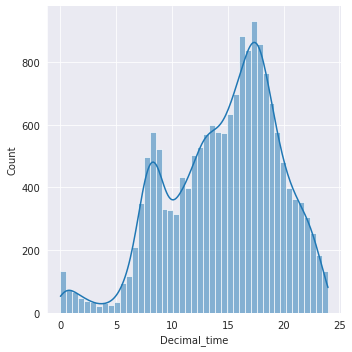

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')
sns.displot(data=merged_accident_motorbike,x=merged_accident_motorbike['Decimal_time'],kde=True)
plt.show()

Hourly bike accdient time

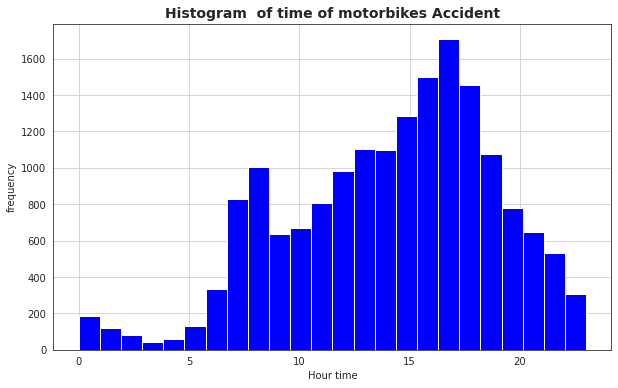

In [ ]:

sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))
merged_accident_motorbike.Hour.hist(bins=24, ax=ax, color='BLUE')
ax.set_title('Histogram  of time of motorbikes Accident', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour time', ylabel='frequency')
plt.show()


[Text(0, 0.5, 'grouped time'), Text(0.5, 0, 'frequency ')]

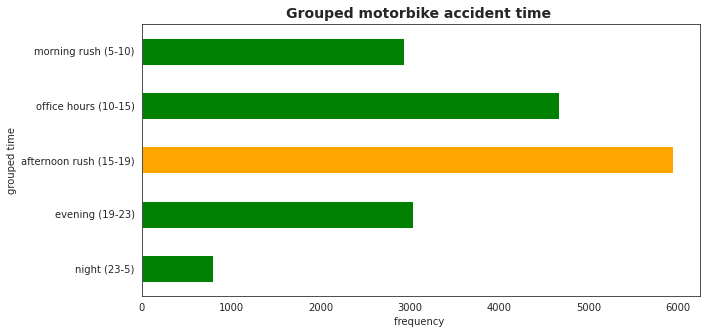

In [ ]:
# plotting time of  bike accident based on time bands 
order = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
Accident_sub = merged_accident_motorbike.groupby('Daytime').size().reindex(order)

fig, ax = plt.subplots(figsize=(10, 5))
colors = ['green', 'green', 'orange', 'green', 'green']
Accident_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('Grouped motorbike accident time ', fontsize=14, fontweight='bold')
ax.set(xlabel='frequency ', ylabel='grouped time')

In [ ]:
merged_accident_motorbike['Day_of_Week'].value_counts()

6    2838
5    2609
4    2598
3    2524
7    2312
2    2275
1    2213
Name: Day_of_Week, dtype: int64

Days of the week in whcih accident occurs for motorbikes 

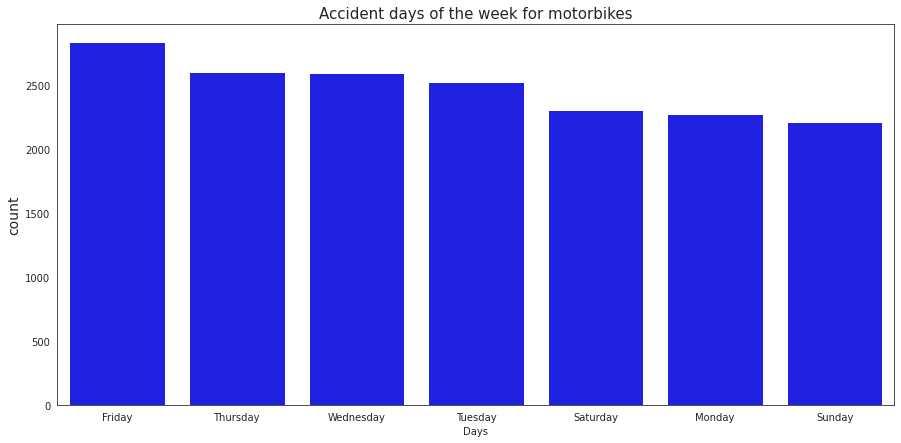

In [ ]:
%matplotlib inline
plt.figure(figsize=(15,7))
ax = sns.countplot(data=merged_accident_motorbike,x=merged_accident_motorbike['Day_of_Week'], order = merged_accident_motorbike['Day_of_Week'].value_counts().index, color = 'BLUE')
ax.set_xticklabels(['Friday','Thursday','Wednesday','Tuesday','Saturday','Monday','Sunday'])                   
plt.title('Accident days of the week for motorbikes',fontsize=15)
plt.xlabel('Days')
plt.ylabel("count", fontsize = 14)
plt.show()

#C: Accident involving Pedestrians

In [ ]:
pedestrian_accident=Casualties_df[Casualties_df['Casualty_Type']==0]

In [ ]:
# Cocatenating pedestrains with casualties and Accident dataframe

merged_pedestrian_accident= Accident_df.merge(pedestrian_accident,on= 'Accident_Index', how = 'inner')

In [ ]:
merged_pedestrian_accident.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Decimal_time', 'Hour', 'Month', 'Daytime',
       'Vehicle_Reference', 'Casualty_Reference', 'Casualty_Class',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty',
       'Casualty_Severity'

plot of Hours of the day in which pedesrians are more likely to be involved in accident

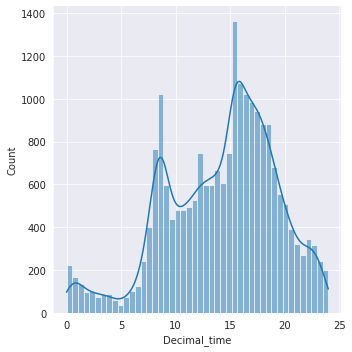

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')
sns.displot(data=merged_pedestrian_accident,x=merged_pedestrian_accident['Decimal_time'],kde=True)
plt.show()

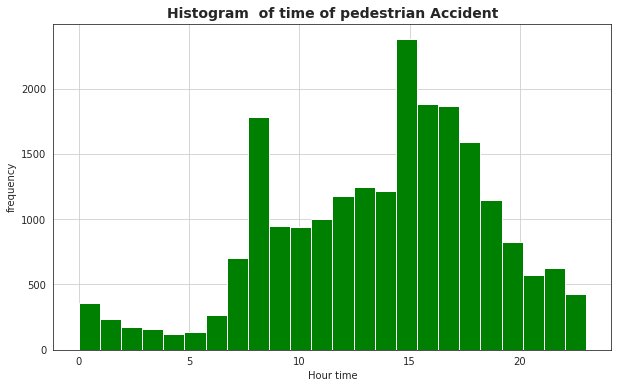

In [ ]:
# Hourly pedestrain  accdient 
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))
merged_pedestrian_accident.Hour.hist(bins=24, ax=ax, color='GREEN')
ax.set_title('Histogram  of time of pedestrian Accident', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour time', ylabel='frequency')
plt.show()


[Text(0, 0.5, 'grouped time'), Text(0.5, 0, 'frequency ')]

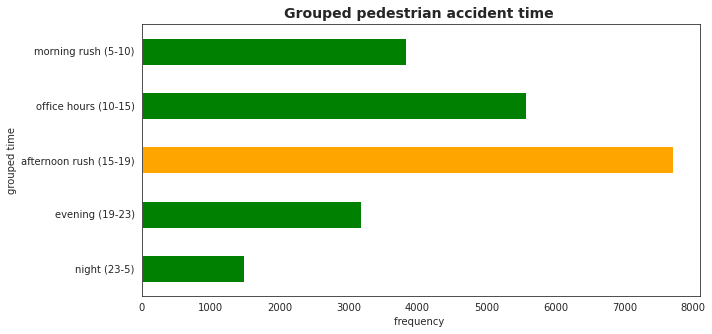

In [ ]:
# plotting time of pedestrian accident based on time bands 
order = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
Accident_sub = merged_pedestrian_accident.groupby('Daytime').size().reindex(order)

fig, ax = plt.subplots(figsize=(10, 5))
colors = ['green', 'green', 'orange', 'green', 'green']
Accident_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('Grouped pedestrian accident time ', fontsize=14, fontweight='bold')
ax.set(xlabel='frequency ', ylabel='grouped time')

Plot of  days of the week in which pedesrians are more likely to be involved in accident

In [ ]:
merged_pedestrian_accident['Day_of_Week'].value_counts()

6    3649
5    3482
4    3372
3    3332
2    3132
7    2839
1    1964
Name: Day_of_Week, dtype: int64

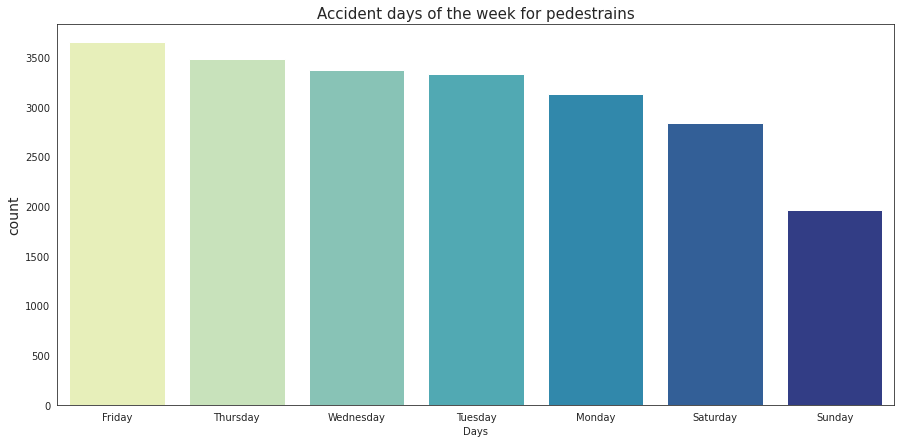

In [ ]:

%matplotlib inline
plt.figure(figsize=(15,7))
ax = sns.countplot(data=merged_pedestrian_accident,x=merged_pedestrian_accident['Day_of_Week'], order = merged_pedestrian_accident['Day_of_Week'].value_counts().index,palette = "YlGnBu")
ax.set_xticklabels(['Friday','Thursday','Wednesday','Tuesday','Monday','Saturday','Sunday'])                   
plt.title('Accident days of the week for pedestrains',fontsize=15)
plt.xlabel('Days')
plt.ylabel("count", fontsize = 14)
plt.show()


#D:Effect of daylight savings on road traffic accident 

ACCORDING TO GOOGLE, DAYLIGHT SAVIGNS START FROM SUNDAY 31st MARCH AT 1.00am and ENDS AT SUNDAY 27 OCTOBER 2,00am

The week after the commencement of daylight savings is 31 March to 06 April.
The week following the end of daylight savings is October 27-November 2.
To determine the effect of daylight savings on accident, I will compare two weeks after daylight savings began to two weeks before it began, and two weeks after it ended to two weeks before it ended.

Two weeks before it begins is from March 17 to March 30.

Two weeks after it begins is from March 31 to April 13.

Two weeks before it ends is October 13 - October 26.

Two weeks after it begins is from October 27 to November 9.

The impact of daylight on accident will be investigated in foru ways :

Percentage of accident that arise as a result of daylight savings

Number of accidents 

Number of Casualties 

Number of Vehicles 

In [ ]:
two_weeks_before_DS_starts = Accident_df[Accident_df.Date.between('2019-03-17', '2019-03-30')]
two_weeks_after_DS_starts = Accident_df[Accident_df.Date.between('2019-03-31', '2019-04-13')]
two_weeks_before_DS_ends = Accident_df[Accident_df.Date.between('2019-10-13', '2019-10-26')]
two_weeks_after_DS_ends = Accident_df[Accident_df.Date.between('2019-10-27', '2019-11-09')]

In [ ]:
four_weeks_before_DS_starts = Accident_df[Accident_df.Date.between('2019-03-17', '2019-04-13')]
four_weeks_before_DS_ends = Accident_df[Accident_df.Date.between('2019-10-13', '2019-11-09')]

In [ ]:
#absolute counts for when DS starts
four_weeks_Ds_starts = pd.DataFrame(four_weeks_before_DS_starts.set_index('Date').resample('7d')['Accident_Index'].size().reset_index())
four_weeks_Ds_starts.columns = ['Date', 'Count']
four_weeks_Ds_starts['Week_no'] = four_weeks_Ds_starts['Date'].dt.week
four_weeks_Ds_starts['%_share'] = round((four_weeks_Ds_starts.Count / four_weeks_Ds_starts.Count.sum())*100,2)
four_weeks_Ds_starts['pct_change'] = round(four_weeks_Ds_starts['Count'].pct_change()*100,2)
four_weeks_Ds_starts

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,Date,Count,Week_no,%_share,pct_change
0,2019-03-17,2056,11,22.83,NaN
1,2019-03-24,2331,12,25.89,13.38
2,2019-03-31,2111,13,23.45,-9.44
3,2019-04-07,2506,14,27.83,18.71


In [ ]:
#absolute counts for when DS ends
four_weeks_Ds_ends = pd.DataFrame(four_weeks_before_DS_ends.set_index('Date').resample('7d')['Accident_Index'].size().reset_index())
four_weeks_Ds_ends.columns = ['Date', 'Count']
four_weeks_Ds_ends['Week_no'] = four_weeks_Ds_ends['Date'].dt.week
four_weeks_Ds_ends['%_share'] = round((four_weeks_Ds_ends.Count / four_weeks_Ds_ends.Count.sum())*100,2)
four_weeks_Ds_ends['pct_change'] = round(four_weeks_Ds_ends['Count'].pct_change()*100,2)
four_weeks_Ds_ends

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,Date,Count,Week_no,%_share,pct_change
0,2019-10-13,2470,41,27.18,NaN
1,2019-10-20,2158,42,23.75,-12.63
2,2019-10-27,2234,43,24.59,3.52
3,2019-11-03,2224,44,24.48,-0.45


1. Percentage 

In [ ]:
no_of_acc_before_DS_starts = two_weeks_before_DS_starts.shape[0]
no_of_acc_after_DS_starts  = two_weeks_after_DS_starts.shape[0]
no_of_acc_before_DS_ends = two_weeks_before_DS_ends.shape[0]
no_of_acc_after_DS_ends = two_weeks_after_DS_ends.shape[0]
print(f'Number of accidents two weeks before daylight savings started: {no_of_acc_before_DS_starts}')
print(f'Number of accidents two weeks after daylight savings started: {no_of_acc_after_DS_starts}')

print(f'Number of accidents two weeks before daylight savings ended: {no_of_acc_before_DS_ends}')
print(f'Number of accidents two weeks after daylight savings ended: {no_of_acc_after_DS_ends}')

Number of accidents two weeks before daylight savings started: 4387
Number of accidents two weeks after daylight savings started: 4617
Number of accidents two weeks before daylight savings ended: 4628
Number of accidents two weeks after daylight savings ended: 4458


In [ ]:
percent_change_start = (no_of_acc_after_DS_starts-no_of_acc_before_DS_starts)/no_of_acc_before_DS_starts

percent_change_end = (no_of_acc_after_DS_ends-no_of_acc_before_DS_ends)/no_of_acc_before_DS_ends

print(f'Percentage change after daylight savings started: {percent_change_start*100:.2f}%')
print(f'Percentage change after daylight savings ended: {percent_change_end*100:.2f}%')

Percentage change after daylight savings started: 5.24%
Percentage change after daylight savings ended: -3.67%


Number of Accident

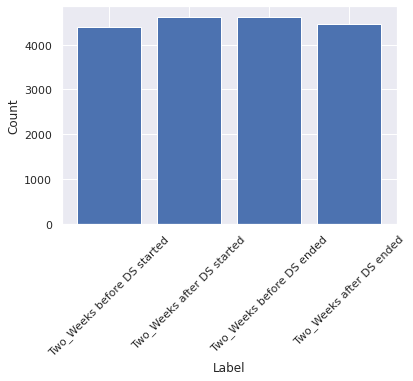

In [ ]:
acc=[
    no_of_acc_before_DS_starts,
    no_of_acc_after_DS_starts,
    no_of_acc_before_DS_ends,
    no_of_acc_after_DS_ends
]

ticks = [
    'Two_Weeks before DS started',
    'Two_Weeks after DS started',
    'Two_Weeks before DS ended',
    'Two_Weeks after DS ended'
]

plt.bar(ticks, acc)
plt.xticks(rotation = 45)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Number of Casualties 

In [ ]:
merged_ac=Accident_df.merge(Casualties_df, on=['Accident_Index'], how='inner') # merging casualties  and accident datatframe

In [ ]:
four_weeks_before_DS_starts_cas = merged_ac[merged_ac.Date.between('2019-03-17', '2019-04-13')]
four_weeks_before_DS_ends_cas = merged_ac[merged_ac.Date.between('2019-10-13', '2019-11-09')]

In [ ]:
#absolute counts for when DS starts
four_weeks_before_DS_starts_cas = pd.DataFrame(four_weeks_before_DS_starts_cas.set_index('Date').resample('7d')['Accident_Index'].size().reset_index())
four_weeks_before_DS_starts_cas.columns = ['Date', 'Count_cas']
four_weeks_before_DS_starts_cas['Week_no'] = four_weeks_before_DS_starts_cas['Date'].dt.week
four_weeks_before_DS_starts_cas['%_share'] = round((four_weeks_before_DS_starts_cas.Count_cas / four_weeks_before_DS_starts_cas.Count_cas.sum())*100,2)
four_weeks_before_DS_starts_cas['pct_change'] = round(four_weeks_before_DS_starts_cas['Count_cas'].pct_change()*100,2)
four_weeks_before_DS_starts_cas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,Date,Count_cas,Week_no,%_share,pct_change
0,2019-03-17,2624,11,22.58,NaN
1,2019-03-24,2973,12,25.59,13.30
2,2019-03-31,2717,13,23.38,-8.61
3,2019-04-07,3306,14,28.45,21.68


In [ ]:
#absolute counts for when DS ends
four_weeks_Ds_ends_cas = pd.DataFrame(four_weeks_before_DS_ends_cas.set_index('Date').resample('7d')['Accident_Index'].size().reset_index())
four_weeks_Ds_ends_cas.columns = ['Date', 'Count_cas']
four_weeks_Ds_ends_cas['Week_no'] = four_weeks_Ds_ends_cas['Date'].dt.week
four_weeks_Ds_ends_cas['%_share'] = round((four_weeks_Ds_ends_cas.Count_cas / four_weeks_Ds_ends_cas.Count_cas.sum())*100,2)
four_weeks_Ds_ends_cas['pct_change'] = round(four_weeks_Ds_ends_cas['Count_cas'].pct_change()*100,2)
four_weeks_Ds_ends_cas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,Date,Count_cas,Week_no,%_share,pct_change
0,2019-10-13,3190,41,27.13,NaN
1,2019-10-20,2824,42,24.02,-11.47
2,2019-10-27,2900,43,24.66,2.69
3,2019-11-03,2844,44,24.19,-1.93


In [ ]:
#absolute counts for when DS ends
four_weeks_Ds_ends_cas = pd.DataFrame(four_weeks_before_DS_ends_cas.set_index('Date').resample('7d')['Accident_Index'].size().reset_index())
four_weeks_Ds_ends_cas.columns = ['Date', 'Count_cas']
four_weeks_Ds_ends_cas['Week_no'] = four_weeks_Ds_ends_cas['Date'].dt.week
four_weeks_Ds_ends_cas['%_share'] = round((four_weeks_Ds_ends_cas.Count_cas / four_weeks_Ds_ends_cas.Count_cas.sum())*100,2)
four_weeks_Ds_ends_cas['pct_change'] = round(four_weeks_Ds_ends_cas['Count_cas'].pct_change()*100,2)
four_weeks_Ds_ends_cas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,Date,Count_cas,Week_no,%_share,pct_change
0,2019-10-13,3190,41,27.13,NaN
1,2019-10-20,2824,42,24.02,-11.47
2,2019-10-27,2900,43,24.66,2.69
3,2019-11-03,2844,44,24.19,-1.93


In [ ]:
print('Number of casualties two weeks before daylight savings started: {}'.format(two_weeks_before_DS_starts.Number_of_Casualties.sum(axis = 0)))
print('Number of casualties two weeks after daylight savings started: {}'.format(two_weeks_after_DS_starts.Number_of_Casualties.sum(axis = 0)))

print('Number of casualties two weeks before daylight savings ended: {}'.format(two_weeks_before_DS_ends.Number_of_Casualties.sum(axis = 0)))
print('Number of casualties two weeks after daylight savings ended: {}'.format(two_weeks_after_DS_ends.Number_of_Casualties.sum(axis = 0)))

Number of casualties two weeks before daylight savings started: 5597
Number of casualties two weeks after daylight savings started: 6023
Number of casualties two weeks before daylight savings ended: 6014
Number of casualties two weeks after daylight savings ended: 5744


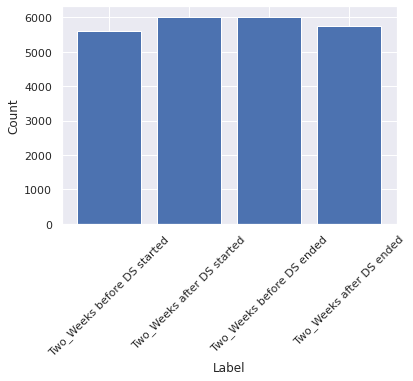

In [ ]:
cas=[
    two_weeks_before_DS_starts.Number_of_Casualties.sum(axis = 0),
    two_weeks_after_DS_starts.Number_of_Casualties.sum(axis = 0),
    two_weeks_before_DS_ends.Number_of_Casualties.sum(axis = 0),
    two_weeks_after_DS_ends.Number_of_Casualties.sum(axis = 0)
]

ticks = [
    'Two_Weeks before DS started',
    'Two_Weeks after DS started',
    'Two_Weeks before DS ended',
    'Two_Weeks after DS ended'
]

plt.bar(ticks, cas)
plt.xticks(rotation = 45)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Number of vehicles 

In [ ]:
merged_av=Accident_df.merge(Vehicles_df, on=['Accident_Index'], how='inner') # merging vehicle and accident datatframe

In [ ]:
four_weeks_before_DS_starts_veh = merged_av[merged_av.Date.between('2019-03-17', '2019-04-13')]
four_weeks_before_DS_ends_veh = merged_av[merged_av.Date.between('2019-10-13', '2019-11-09')]

In [ ]:
#absolute counts for when DS starts
four_weeks_Ds_starts_veh = pd.DataFrame(four_weeks_before_DS_starts_veh.set_index('Date').resample('7d')['Accident_Index'].size().reset_index())
four_weeks_Ds_starts_veh.columns = ['Date', 'Count_veh']
four_weeks_Ds_starts_veh['Week_no'] = four_weeks_Ds_starts_veh['Date'].dt.week
four_weeks_Ds_starts_veh['%_share'] = round((four_weeks_Ds_starts_veh.Count_veh / four_weeks_Ds_starts_veh.Count_veh.sum())*100,2)
four_weeks_Ds_starts_veh['pct_change'] = round(four_weeks_Ds_starts_veh['Count_veh'].pct_change()*100,2)
four_weeks_Ds_starts_veh

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,Date,Count_veh,Week_no,%_share,pct_change
0,2019-03-17,3794,11,22.68,NaN
1,2019-03-24,4398,12,26.29,15.92
2,2019-03-31,3842,13,22.97,-12.64
3,2019-04-07,4692,14,28.05,22.12


In [ ]:
#absolute counts for when DS ends
four_weeks_Ds_ends_veh = pd.DataFrame(four_weeks_before_DS_ends_veh.set_index('Date').resample('7d')['Accident_Index'].size().reset_index())
four_weeks_Ds_ends_veh.columns = ['Date', 'Count_veh']
four_weeks_Ds_ends_veh['Week_no'] = four_weeks_Ds_ends_veh['Date'].dt.week
four_weeks_Ds_ends_veh['%_share'] = round((four_weeks_Ds_ends_veh.Count_veh / four_weeks_Ds_ends_veh.Count_veh.sum())*100,2)
four_weeks_Ds_ends_veh['pct_change'] = round(four_weeks_Ds_ends_veh['Count_veh'].pct_change()*100,2)
four_weeks_Ds_ends_veh

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,Date,Count_veh,Week_no,%_share,pct_change
0,2019-10-13,4506,41,26.92,NaN
1,2019-10-20,3958,42,23.64,-12.16
2,2019-10-27,4153,43,24.81,4.93
3,2019-11-03,4123,44,24.63,-0.72


In [ ]:
print('Number of vehicles involved in accidents two weeks before daylight savings started: {}'.format(two_weeks_before_DS_starts.Number_of_Vehicles.sum(axis = 0)))
print('Number of vehicles involved in accidents two weeks after daylight savings started: {}'.format(two_weeks_after_DS_starts.Number_of_Vehicles.sum(axis = 0)))

print('Number of vehicles involved in accidents two weeks before daylight savings ended: {}'.format(two_weeks_before_DS_ends.Number_of_Vehicles.sum(axis = 0)))
print('Number of vehicles involved in accidents two weeks after daylight savings ended: {}'.format(two_weeks_after_DS_ends.Number_of_Vehicles.sum(axis = 0)))

Number of vehicles involved in accidents two weeks before daylight savings started: 8192
Number of vehicles involved in accidents two weeks after daylight savings started: 8534
Number of vehicles involved in accidents two weeks before daylight savings ended: 8464
Number of vehicles involved in accidents two weeks after daylight savings ended: 8276


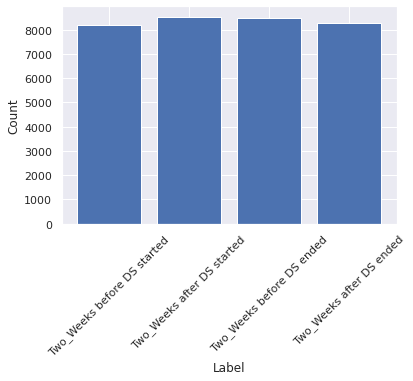

In [ ]:
veh=[
    two_weeks_before_DS_starts.Number_of_Vehicles.sum(axis = 0),
    two_weeks_after_DS_starts.Number_of_Vehicles.sum(axis = 0),
    two_weeks_before_DS_ends.Number_of_Vehicles.sum(axis = 0),
    two_weeks_after_DS_ends.Number_of_Vehicles.sum(axis = 0)
]

ticks = [
    'Two_Weeks before DS started',
    'Two_Weeks after DS started',
    'Two_Weeks before DS ended',
    'Two_Weeks after DS ended'
]

plt.bar(ticks, veh)
plt.xticks(rotation = 45)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

#E:  Impact of sunrise and sunset times on road accident 

What impact, if any, does sunrise and sunset times have on road traffic accidents?

I will be analysing this question in two ways;
1st analysis - I will find the monthly accidents between 4:30 a.m to 9:00 am (sunrise) and 16:00 p.m to 20:00 p.m.

2nd analysis - The investigation will be divided into seasons because sunrise and sunset are not consistent throughout the year. Spring, summer, autumn, and winter are the four seasons in the United Kingdom. I used time and dates to find the sunrise and sunset hours for 2019. In 2019, the average sunrise and sunset times in the United Kingdom are shown in the table below.
Season	Months	Sunrise	Sunset

Spring	March, April, and May	6 am	8 pm

Summer	June, July, and August	4 am	9 pm

Autumn	September, October, and November	7 am	5 pm

Winter	December, January, and February	8 am	4 pm


In [ ]:
#sunrise between 4:30 am and 9:00 am
sunrise_effect = Accident_df[Accident_df['Decimal_time'].between(4.5,9)]
sunrise_effect.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Hour,Month,Decimal_time
9,2019010155207,522267.0,168185.0,-0.243769,51.399529,1,3,3,1,2019-01-01,...,1,1,0,0,1,1,E01003469,4,1,4.500000
15,2019010155221,538407.0,180538.0,-0.007064,51.506832,1,2,1,1,2019-01-01,...,1,1,0,0,1,1,E01032780,5,1,5.916667


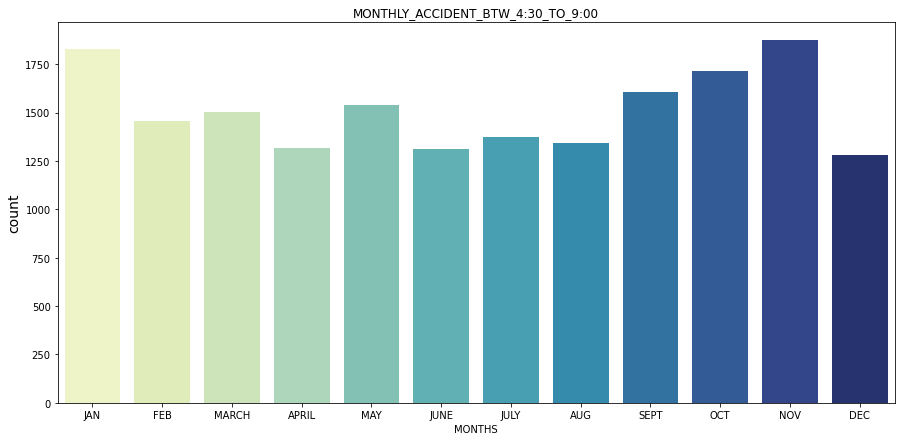

In [ ]:
%matplotlib inline
plt.figure(figsize=(15,7))
ax = sns.countplot(x = sunrise_effect['Month'], data = sunrise_effect, palette = "YlGnBu")
ax.set_xticklabels(['JAN','FEB','MARCH','APRIL','MAY','JUNE','JULY','AUG','SEPT','OCT','NOV','DEC'])                   
plt.title('MONTHLY_ACCIDENT_BTW_4:30_TO_9:00')
plt.xlabel('MONTHS')
plt.ylabel("count", fontsize = 14)
plt.show()

In [ ]:
#Plotting the seasons
acci_df = Accident_df.copy()
acci_df = acci_df.dropna() 
acci_df.Hour = acci_df.Hour.astype(int)
acci_df = acci_df.sort_values(by=['Hour'])

Spring_df = acci_df[acci_df.Date.dt.month.isin(range(3,6))]
Summer_df = acci_df[acci_df.Date.dt.month.isin(range(6,9))]
Autumn_df = acci_df[acci_df.Date.dt.month.isin(range(9,12))]
Winter_df = acci_df[acci_df.Date.dt.month.isin([12, 1, 2])]

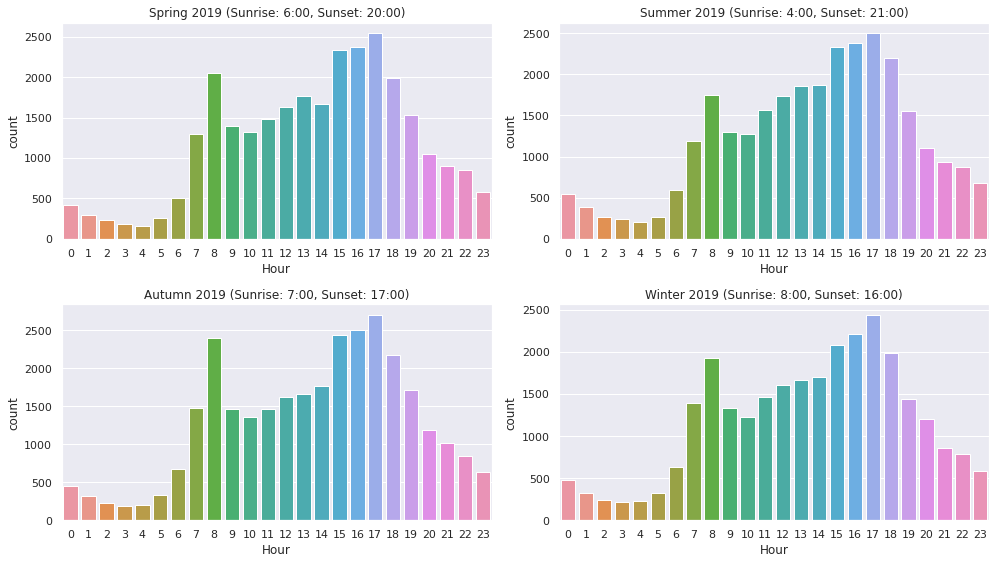

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(221)
sns.countplot(x = 'Hour', data = Spring_df)
plt.title('Spring 2019 (Sunrise: 6:00, Sunset: 20:00)')

plt.subplot(222)
sns.countplot(x = 'Hour', data = Summer_df)
plt.title('Summer 2019 (Sunrise: 4:00, Sunset: 21:00)')

plt.subplot(223)
sns.countplot(x = 'Hour', data = Autumn_df)
plt.title('Autumn 2019 (Sunrise: 7:00, Sunset: 17:00)')

plt.subplot(224)
sns.countplot(x = 'Hour', data = Winter_df)
plt.title('Winter 2019 (Sunrise: 8:00, Sunset: 16:00)')

plt.tight_layout()
plt.show()

# Part F: Effect of Vehicle Types on Road Accident 

In [ ]:
# subsetting engine capacity and age of vehicle column in vehicles dataframe 
Effect_of_vehicle_type = Vehicles_df.loc[:,['Engine_Capacity_(CC)','Age_of_Vehicle']]
x = Effect_of_vehicle_type
x

,Engine_Capacity_(CC),Age_of_Vehicle
0,-1,-1
1,-1,-1
2,-1,-1
3,-1,-1
4,-1,-1
...,...,...
216376,2198,4
216377,1997,12
216378,2967,5
216379,1597,6


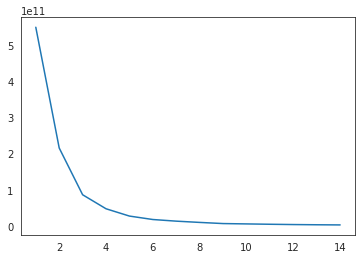

In [ ]:
# finding the best cluister with elbow method 
cluster_list = []
for i in range(1, 15):
    
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    cluster_list.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,15), cluster_list)
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
labels=kmeans.predict(x)
centroids = kmeans.cluster_centers_
labels

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

In [ ]:
centroids

array([[5.06203328e+01, 5.37664225e-01],
       [1.72877569e+03, 7.93841067e+00],
       [9.73469729e+03, 6.33924375e+00]])

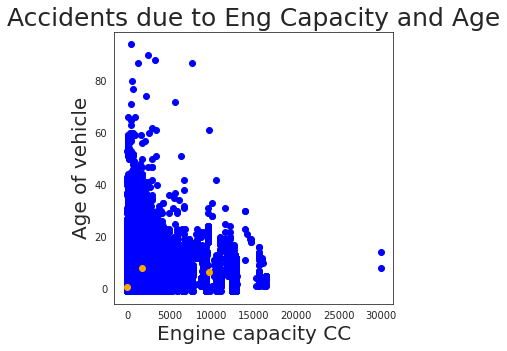

In [ ]:
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], labels)
plt.xlabel('Engine capacity CC',fontdict = {'fontsize' : 20})
plt.ylabel('Age of vehicle',fontdict = {'fontsize' : 20})
plt.title('Accidents due to Eng Capacity and Age', fontdict = {'fontsize' : 25})
plt.scatter(x['Engine_Capacity_(CC)'],x['Age_of_Vehicle'],color="blue")
plt.scatter(centroids[:,0],centroids[:,1],color="orange")
plt.show()

Effect of Engine capacity

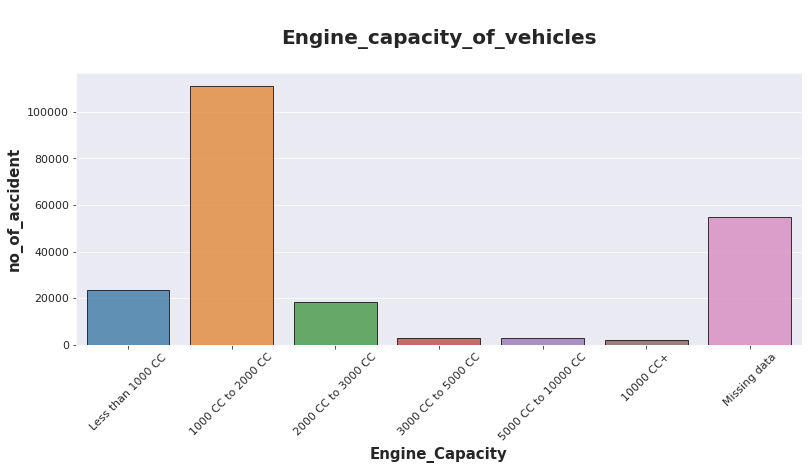

In [ ]:
# Engine_capacity_of_vehicles
sns.set_style('darkgrid')
eng_cat_code = [1,2,3,4,5,6,-1]

plt.figure(figsize=(13,5))
eng_cat = sns.countplot(x =Vehicles_df['Engine_CC_grouped'], 
                                        data=Vehicles_df, 
                                        order = eng_cat_code,
                                        edgecolor='black',
                                        alpha=0.75,
                                        linewidth=1)


eng_cat.set_xticklabels(['Less than 1000 CC',
                         '1000 CC to 2000 CC',
                         '2000 CC to 3000 CC',
                         '3000 CC to 5000 CC',
                         '5000 CC to 10000 CC',
                         '10000 CC+',
                         'Missing data'], rotation=45)
plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.title('\nEngine_capacity_of_vehicles\n', fontsize=20,fontweight='bold')
plt.xlabel('Engine_Capacity', fontsize = 15, fontweight='bold')
plt.ylabel('no_of_accident', fontsize = 15, fontweight='bold')
sns.despine(top=False, right=True, left=False, bottom=False)
plt.show()

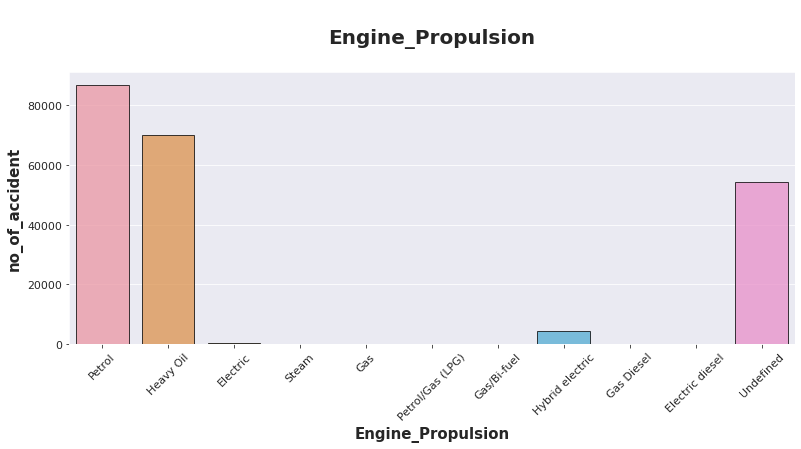

In [ ]:
# Propulsion
sns.set_style('darkgrid')
prop_code = [1,2,3,4,5,6,7,8,9,12,-1]

plt.figure(figsize=(13,5))
prop_cat = sns.countplot(x =Vehicles_df['Propulsion_Code'], 
                                        data=Vehicles_df, 
                                        order = prop_code,
                                        edgecolor='black',
                                        alpha=0.75,
                                        linewidth=1)


prop_cat.set_xticklabels(['Petrol', 'Heavy Oil', 'Electric', 'Steam', 'Gas',
                             'Petrol/Gas (LPG)','Gas/Bi-fuel','Hybrid electric',
                             'Gas Diesel', 'Electric diesel', 'Undefined'], rotation=45)

plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.title('\nEngine_Propulsion\n', fontsize=20,fontweight='bold')
plt.xlabel('Engine_Propulsion', fontsize = 15, fontweight='bold')
plt.ylabel('no_of_accident', fontsize = 15, fontweight='bold')
sns.despine(top=False, right=True, left=False, bottom=False)
plt.show()

In [ ]:
#Group similar vehicles together
#motorbikes = 2,3,4,5,23,97 = change everything to 2
#cars = 8 and 9 = change to 8
#van goods = 19,20,21,98 = change to 19
vehicle_df2 = Vehicles_df.copy()
vehicle_df2['Vehicle_Type'] = vehicle_df2['Vehicle_Type'].replace([3,4,5,23,97],2)
vehicle_df2['Vehicle_Type'] = vehicle_df2['Vehicle_Type'].replace([9],8)
vehicle_df2['Vehicle_Type'] = vehicle_df2['Vehicle_Type'].replace([20,21,98],19)

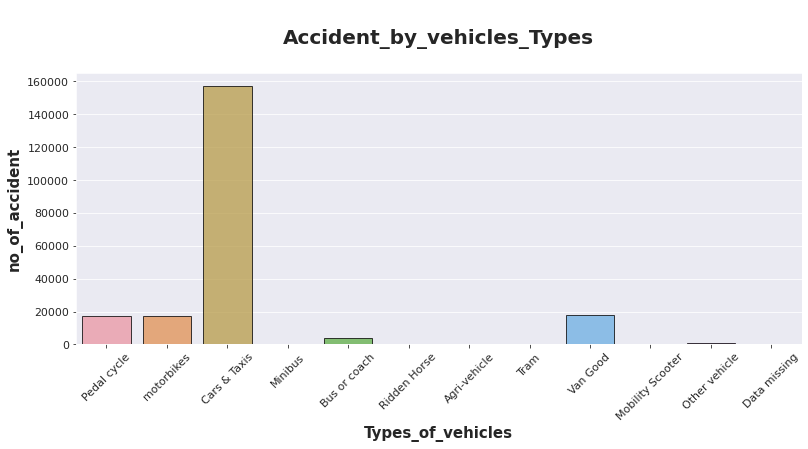

In [ ]:
# Types of vehicles
sns.set_style('darkgrid')
veh_code = [1,2,8,10,11,16,17,18,19,22,90,-1]

plt.figure(figsize=(13,5))
veh_cat = sns.countplot(x =vehicle_df2['Vehicle_Type'], 
                                        data=vehicle_df2, 
                                        order = veh_code,
                                        edgecolor='black',
                                        alpha=0.75,
                                        linewidth=1)


veh_cat.set_xticklabels(['Pedal cycle', 'motorbikes', 'Cars & Taxis',
                                    'Minibus','Bus or coach', 'Ridden Horse',
                                    'Agri-vehicle', 'Tram', 'Van Good', 'Mobility Scooter',
                                    'Other vehicle', 'Data missing'], rotation=45)

plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)
plt.title('\nAccident_by_vehicles_Types\n', fontsize=20,fontweight='bold')
plt.xlabel('Types_of_vehicles', fontsize = 15, fontweight='bold')
plt.ylabel('no_of_accident', fontsize = 15, fontweight='bold')
sns.despine(top=False, right=True, left=False, bottom=False)
plt.show()

Boxplot of Age of vehicles and Engine capacity 

In [ ]:
num_cols = ['Age_of_Vehicle', 'Engine_Capacity_(CC)']
accvec_df=Accident_df.merge(Vehicles_df, on=['Accident_Index'], how='inner')

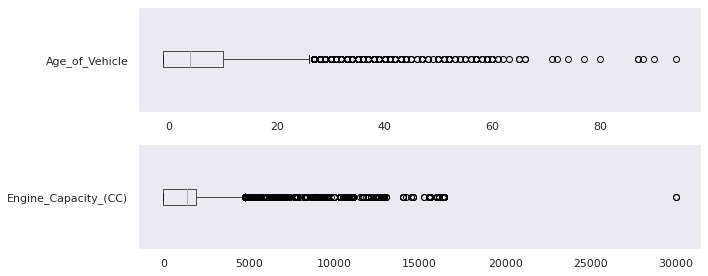

In [ ]:
# plotting boxplots
sns.set(style='darkgrid')
fig, axes = plt.subplots(2,1, figsize=(10,4))

for ax, col in zip(axes, num_cols):
    accvec_df.boxplot(column=col, grid=False, vert=False, ax=ax)
    plt.tight_layout();


The boxplot shows indicates the median age of vehicle involved in accident  to be around 5years with high potential outliers while the mean engine capacity involved in accident is around 1500. This boxplot shows significantly that most of the values in Age of Vehicles and Engine capacity are outliers

#G: effect of geographic conditions (weahther,geographic locations, road type, etc) on road traffic accident

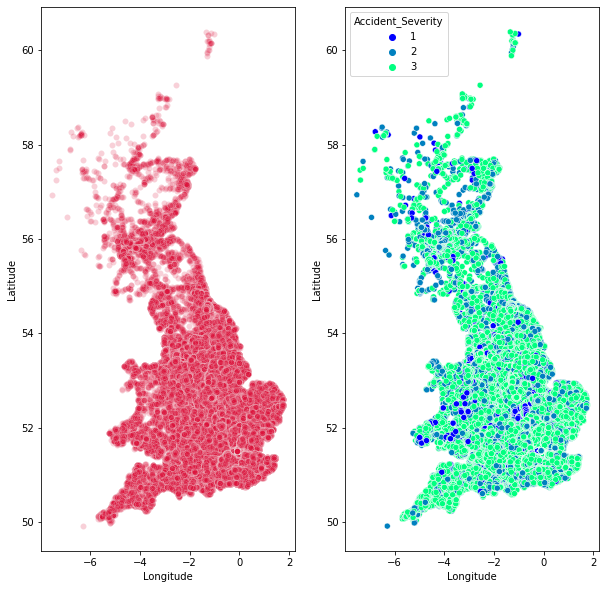

In [ ]:
# Effect of geographical condition on accident 
# Scatterplot of longitude and latitude 
# Shows dsitribution of accdient across the locations specified by latitude and longitide pair

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
sns.scatterplot(data=Accident_df, x = "Longitude", y = "Latitude", color = "crimson", alpha = 0.2)

plt.subplot(1,2,2)
sns.scatterplot(data=Accident_df, x = "Longitude", y = "Latitude", hue = "Accident_Severity", palette = "winter")
plt.show()


Accident severity segregated into two locations (urban and rural)

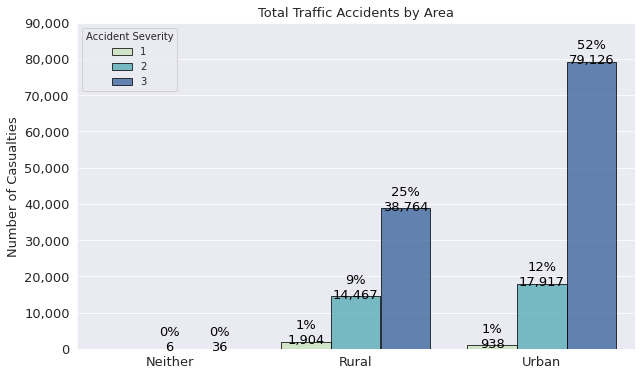

In [ ]:
#Create Dataframe for Urban or Rural Area, Road Type and sum for Number of Casualties

area_road_type = Accident_df.groupby(['Urban_or_Rural_Area',
                                     'Road_Type',
                                    'Accident_Severity']).sum()['Number_of_Casualties'].to_frame().reset_index()

# Convert Urban or Rural Area (1 or 2) raw data for respective area
area_road_type['Urban_or_Rural_Area'] = [str('Urban') if value==1 else str('Rural') if value==2 else str('Neither') 
                                         for value in area_road_type['Urban_or_Rural_Area']]
area_type = area_road_type.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).sum()['Number_of_Casualties'].to_frame().reset_index()
total_casualties = area_type['Number_of_Casualties'].sum()

road_type = area_road_type.groupby(['Urban_or_Rural_Area', 'Road_Type']).sum()['Number_of_Casualties'].to_frame().reset_index()
urban_road = road_type.loc[road_type['Urban_or_Rural_Area']=='Urban',:].sort_values('Number_of_Casualties', 
                                                                                    ascending=False)
rural_road = road_type.loc[road_type['Urban_or_Rural_Area']=='Rural',:].sort_values('Number_of_Casualties', 
                                                                                    ascending=False)


plt.figure(figsize=(10,6))
g = sns.barplot(x='Urban_or_Rural_Area', y='Number_of_Casualties', hue='Accident_Severity', data=area_type, 
                palette = "YlGnBu", linewidth=1, edgecolor='black', alpha=0.75)
sns.set_style('darkgrid')

# Determine y-axis
y_max = max(area_type['Number_of_Casualties'])+2500
y_max -= y_max % -10000
step = 10000
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)

plt.xlabel('')
plt.ylabel('Number of Casualties', fontsize=13)

ax = g.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}%".format((p.get_height()/total_casualties)*100)+"\n"+("{:,.0f}".format(p.get_height())), 
                xy=((p.get_x() + p.get_width() / 2., p.get_height()+2000)),
                ha='center', va='center', color='black', xytext=(0, 2), 
                textcoords='offset points', fontsize=13)  
plt.legend(loc='upper left', title='Accident Severity', frameon=True)
plt.title('Total Traffic Accidents by Area', fontsize=13)
plt.show()

Seperating Accident severity into locations(Urban and rural areas), I discovered that 65% casualties are from urban area of whcih 52% have slight severity. The severity of accident in the rural areas are much more varied with seriuos accident severity contributing 9% of the  total casualties 25% of the accident that occurs in rural area.Compared to urban area, Rural area has higher probability of recording fatal accident if it does occurs.

Analysing rural and urban accident severity further 

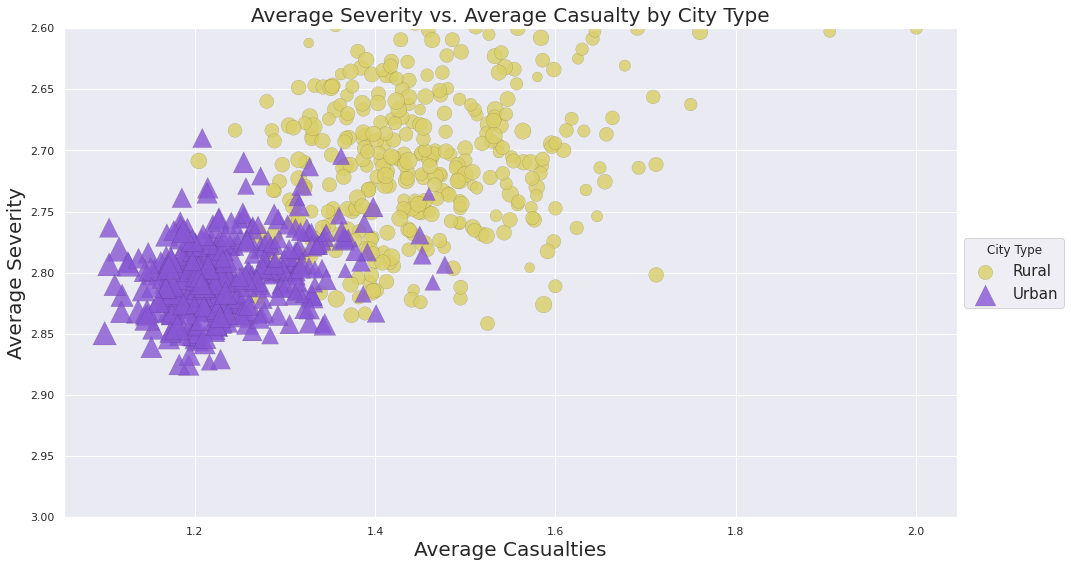

In [ ]:
#--------------- Create Data Frames for Urban v. Rural --------------- 
urban = Accident_df[Accident_df["Urban_or_Rural_Area"] == 1]
rural = Accident_df[Accident_df["Urban_or_Rural_Area"] == 2]

#--------------- Calculations by City Type --------------- 
rural_mean_1 = rural.groupby(["Date"]).mean()["Accident_Severity"]
rural_mean_2 = rural.groupby(["Date"]).mean()["Number_of_Casualties"]
rural_count_3 = rural.groupby(["Date"]).count()["Accident_Index"]

urban_mean_1 = urban.groupby(["Date"]).mean()["Accident_Severity"]
urban_mean_2 = urban.groupby(["Date"]).mean()["Number_of_Casualties"]
urban_count_3 = urban.groupby(["Date"]).count()["Accident_Index"]

#--------------- Set Parameters for Scatterplot --------------- 
plt.rcParams["figure.figsize"] = [16,9]
sns.set()

plt.title("Average Severity vs. Average Casualty by City Type", size=20)
plt.ylabel("Average Severity", size=20)
plt.xlabel("Average Casualties", size=20)
plt.ylim([3, 2.6])
plt.scatter(rural_mean_2,
            rural_mean_1,
            color="#DACF68",
            s=rural_count_3*2,
            edgecolor="black", linewidths= 0.1,
            alpha=0.8, label="Rural")

plt.scatter(urban_mean_2,
            urban_mean_1,
            color="#8757D4",
            s=urban_count_3*2,
            edgecolor="black", linewidths=0.1, marker="^", 
            alpha=0.8, label="Urban")

#--------------- Set Legend --------------- 
plt.legend(title='City Type', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.show()


The above scatterplot also shows that Accident are more concentrated in the urban arears than rural areas. But. since majority of the accident in the urban arears have slight severity , this has a serious effect in pushing the average accident security to slight as shown below

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


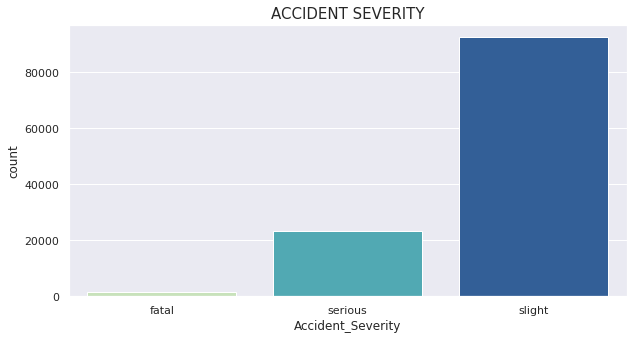

In [ ]:
# showing severity of the accident 

plt.figure(figsize=(10,5))
ax=sns.countplot(Accident_df['Accident_Severity'], palette = "YlGnBu")
plt.title('ACCIDENT SEVERITY', fontsize=15)
ax.set_xticklabels(['fatal','serious','slight'])
plt.show()

Accident severity and police force 

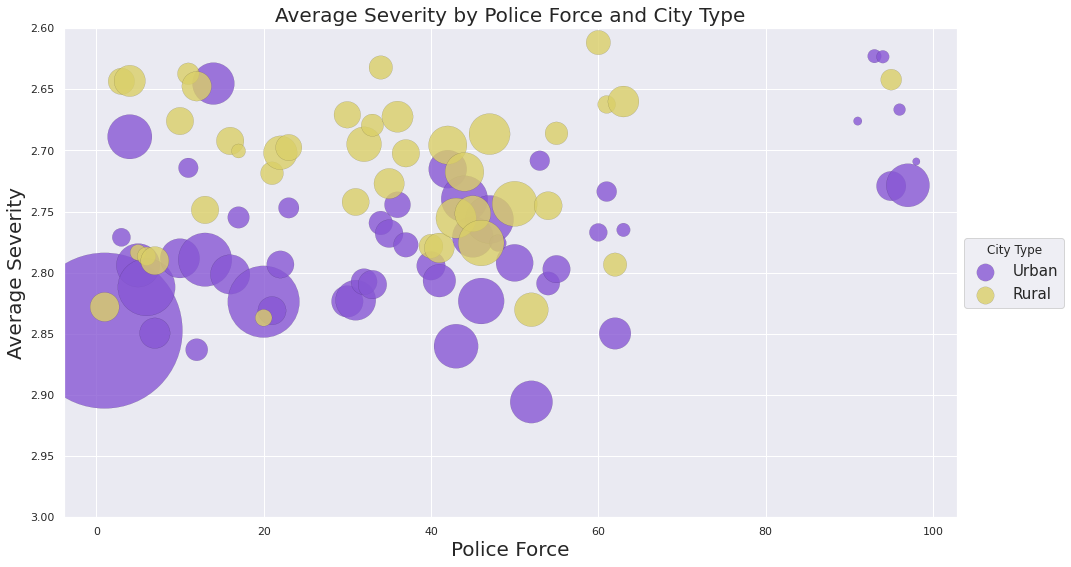

In [ ]:
urban = Accident_df[Accident_df["Urban_or_Rural_Area"] == 1]
rural = Accident_df[Accident_df["Urban_or_Rural_Area"] == 2]

police_severity_urban = list(urban.groupby(["Police_Force"]).mean()["Accident_Severity"])
police_casualty_urban = list(urban.groupby(["Police_Force"]).count()["Number_of_Casualties"])
police_force_urban = list(urban["Police_Force"].unique())
police_force_urban.sort()
                             
police_severity_rural = list(rural.groupby(["Police_Force"]).mean()["Accident_Severity"])
police_casualty_rural = list(rural.groupby(["Police_Force"]).count()["Number_of_Casualties"])
police_force_rural = list(rural["Police_Force"].unique())
police_force_rural.sort()

#--------------- Set Parameters for Scatterplot ---------------
plt.rcParams["figure.figsize"] = [16,9]

plt.title("Average Severity by Police Force and City Type", size=20)
plt.ylabel("Average Severity", size=20)
plt.xlabel("Police Force", size=20)
plt.ylim([3, 2.6])

plt.scatter(police_force_urban,
            police_severity_urban, 
            color="#8757D4",
            s=police_casualty_urban,
            edgecolor="black", linewidths= 0.1,
            alpha=0.8, label="Urban")


plt.scatter(police_force_rural,
            police_severity_rural, 
            color="#DACF68",
            s=police_casualty_rural,
            edgecolor="black", linewidths= 0.1,
            alpha=0.8, label="Rural")

#--------------- Set Legend --------------- 
legend = plt.legend(title='City Type', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
legend.legendHandles[0]._sizes = [300]
legend.legendHandles[1]._sizes = [300]

plt.show()


There is no much correllation between accident severity and police force. This may mean that some accident would have gone unreported 

Effect of road type on accident

In [ ]:
Accident_df['Road_Type'].value_counts()

6    85320
3    18590
1     6880
2     2664
9     2143
7     1939
Name: Road_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


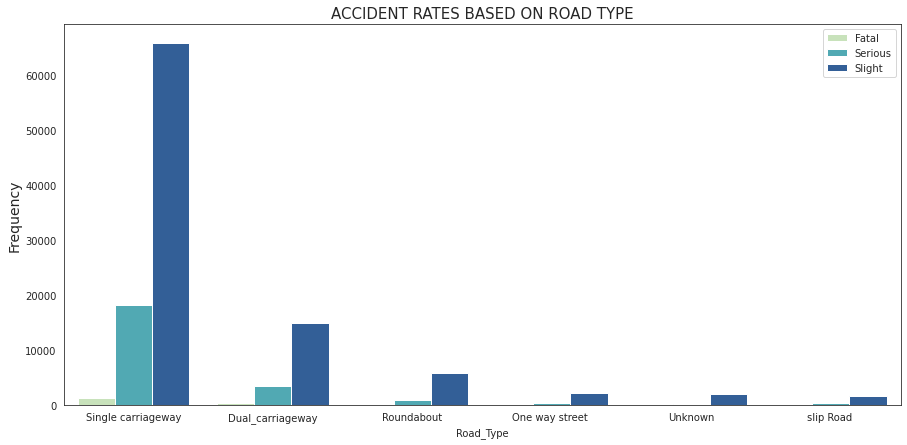

In [ ]:
# Effect of road type on accident

plt.figure(figsize=(15,7))
ax = sns.countplot('Road_Type',hue='Accident_Severity',data=Accident_df, 
                   order = Accident_df["Road_Type"].value_counts().index, palette = "YlGnBu")
ax.set_xticklabels(['Single carriageway','Dual_carriageway','Roundabout',
                    'One way street ',
                    'Unknown','slip Road '])
plt.legend(['Fatal','Serious','Slight'])
plt.title('ACCIDENT RATES BASED ON ROAD TYPE',fontsize=15)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

Effect of Light conditions on Traffic Accident

In [ ]:
Accident_df["Light_Conditions"].value_counts()   # To know how to order the ticklabels

 1    83511
 4    24407
 6     6092
 7     2634
 5      891
-1        1
Name: Light_Conditions, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


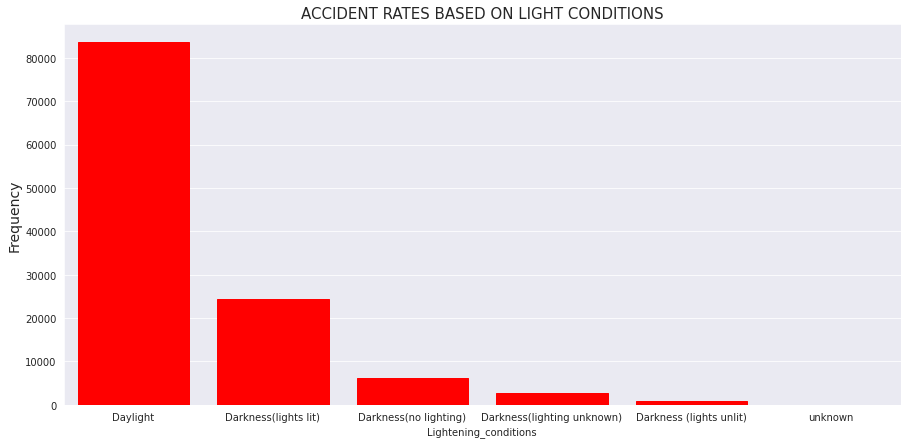

In [ ]:
# effect of light condition on accident
%matplotlib inline
plt.figure(figsize=(15,7))
ax=sns.countplot('Light_Conditions',data=Accident_df,
                 order = Accident_df["Light_Conditions"].value_counts().index,
                 Color = "RED") 
ax.set_xticklabels(['Daylight','Darkness(lights lit)',
                    'Darkness(no lighting)',
                    'Darkness(lighting unknown)',
                    'Darkness (lights unlit)','unknown'])
plt.title('ACCIDENT RATES BASED ON LIGHT CONDITIONS',fontsize=15)
plt.xlabel('Lightening_conditions')
plt.ylabel("Frequency", fontsize = 14)
plt.show()

In [ ]:
Accident_df["Weather_Conditions"].value_counts() 

1    92316
2    15294
9     3436
8     3043
5     1430
4     1230
7      394
3      353
6       40
Name: Weather_Conditions, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


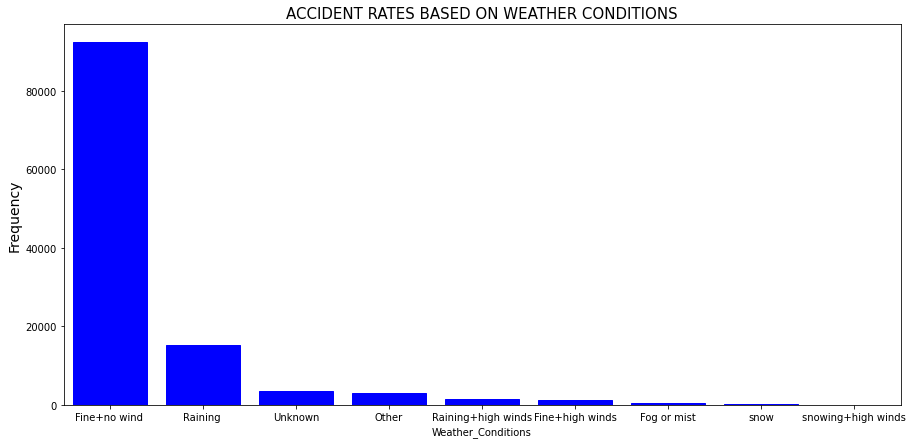

In [ ]:
# effect of weather conditions on accident
# Fine = Fine + no wind , Raining = Raining+ now wind , snow = snow + no wind
%matplotlib inline
plt.figure(figsize=(15,7))
ax=sns.countplot('Weather_Conditions',data=Accident_df,
                 order = Accident_df["Weather_Conditions"].value_counts().index,
                 Color = "BLUE") 
ax.set_xticklabels(['Fine+no wind ','Raining ',
                    'Unknown',
                    'Other',
                    'Raining+high winds','Fine+high winds','Fog or mist','snow','snowing+high winds'])
plt.title('ACCIDENT RATES BASED ON WEATHER CONDITIONS',fontsize=15)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

Effect of speed on Accident Traffic Accident

In [ ]:
Accident_df["Speed_limit"].value_counts() 

 30    69305
 60    14514
 20    11747
 40    10021
 70     7153
 50     4716
-1        80
Name: Speed_limit, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


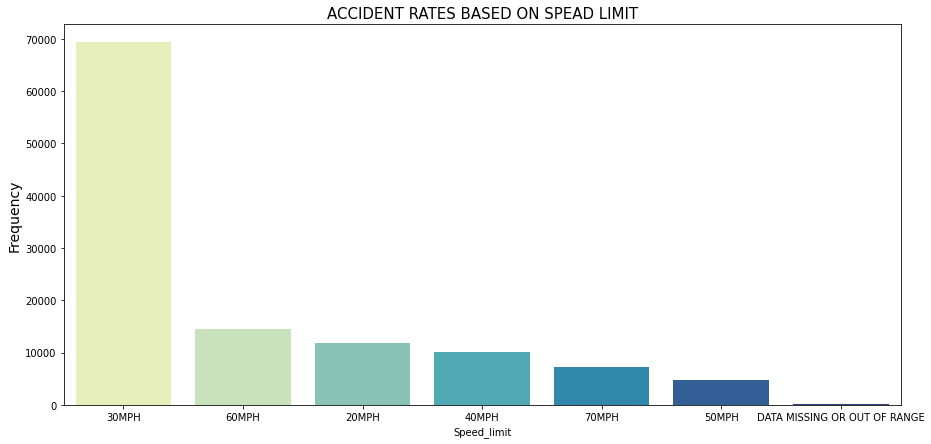

In [ ]:
# effect of speed limit on accident

plt.figure(figsize=(15,7))
ax=sns.countplot('Speed_limit',data=Accident_df,
                 order = Accident_df["Speed_limit"].value_counts().index,palette = "YlGnBu") 
ax.set_xticklabels(['30MPH','60MPH',
                    '20MPH',
                    '40MPH',
                    '70MPH','50MPH','DATA MISSING OR OUT OF RANGE'])
plt.title('ACCIDENT RATES BASED ON SPEAD LIMIT',fontsize=15)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

Majority of the accident occurs at a speed of 30MPH.This is surprising! I actually expected most of the accident to be on high way. some of the accidents might be at the junction, as a result of changing lanes or stop signs  

In [ ]:
# coverting road_type from integers to the type of roads for analysis 
def road_type_conversion(road_type):
    if road_type ==1:
        return "Round"
    elif road_type ==2:
        return "one_way"
    elif road_type ==3:
        return "Dual"
    elif road_type == 6:
        return "single"
    elif road_type == 7:
        return 'slip'
    elif road_type == 9:
        return "unknown"
    elif road_type == 12:
        return 'one way slip road'

In [ ]:
Accident_df['road_effect']=Accident_df['Road_Type'].apply(road_type_conversion)

In [ ]:

Accident_df['road_effect'].value_counts()

single     85320
Dual       18590
Round       6880
one_way     2664
unknown     2143
slip        1939
Name: road_effect, dtype: int64

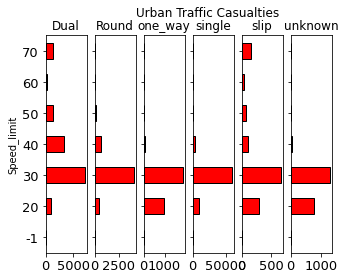

In [ ]:
#Create dataframe grouped by Urban or Rural Area, Road Type, Speed Limit and sum for Number of Casualties
accidents_speed = Accident_df.groupby(['Urban_or_Rural_Area', 
                                      'road_effect',
                                      'Speed_limit']).sum()['Number_of_Casualties'].to_frame().reset_index()
accidents_speed = accidents_speed.sort_values('Number_of_Casualties')
# Convert Urban or Rural Area (1 or 2) raw data for respective area
accidents_speed['Urban_or_Rural_Area'] = [str('Urban') if value==1 else str('Rural') if value==2 else str('Neither') 
                                         for value in accidents_speed['Urban_or_Rural_Area']]

# Create table for Urban traffic accidents and their speed limits and road types
urban_accidents_speed = accidents_speed.loc[accidents_speed['Urban_or_Rural_Area']=='Urban',:]
urban_accidents_speed = urban_accidents_speed.pivot_table(values='Number_of_Casualties', 
                                                          index='Speed_limit', 
                                                          columns='road_effect', 
                                                          aggfunc=np.sum,
                                                          fill_value=0)
# Plot horizontal bar chart for Urban
urban_accidents_speed.plot(kind='barh', subplots=True, sharex=False, sharey=True,
                           title='Urban Traffic Casualties', legend=False, fontsize=13,
                           layout=(1,7), stacked=False,color = 'RED', edgecolor='black')
plt.ylabel('Speed Limit (km)', fontsize=13)
plt.show()

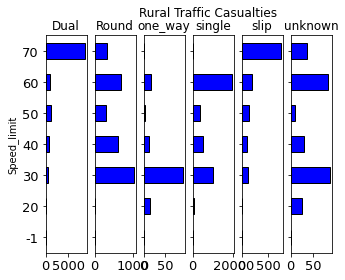

In [ ]:
# Create table for Rural traffic accidents and their speed limits and road types
rural_accidents_speed = accidents_speed.loc[accidents_speed['Urban_or_Rural_Area']=='Rural',:]
rural_accidents_speed = rural_accidents_speed.pivot_table(values='Number_of_Casualties', 
                                                          index='Speed_limit', 
                                                          columns='road_effect', 
                                                          aggfunc=np.sum,
                                                          fill_value=0)
# Plot horizontal bar chart for Rural
rural_accidents_speed.plot(kind='barh', subplots=True, sharex=False, sharey=True, 
                           title='Rural Traffic Casualties', legend=False, fontsize=13,
                           layout=(1,7), stacked=True, color='BLUE', edgecolor='black')

plt.ylabel('Speed Limit (km)', fontsize=13)
plt.show()

In [ ]:
Accident_df["Road_Surface_Conditions"].value_counts() 

 1    82321
 2    32259
-1     1349
 4     1185
 3      245
 5      177
Name: Road_Surface_Conditions, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


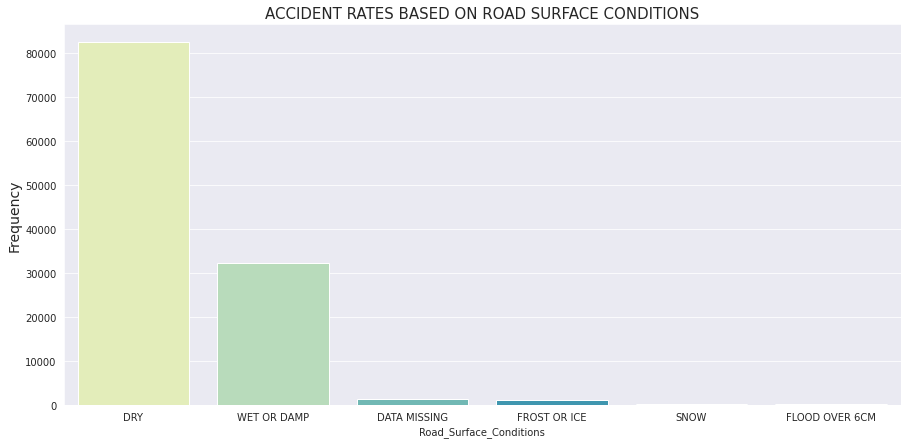

In [ ]:
# effect of Road_surface_conditions on accident

plt.figure(figsize=(15,7))
ax=sns.countplot('Road_Surface_Conditions',data=Accident_df,
                 order = Accident_df["Road_Surface_Conditions"].value_counts().index,palette = "YlGnBu") 
ax.set_xticklabels(['DRY','WET OR DAMP',
                    'DATA MISSING',
                    'FROST OR ICE',
                    'SNOW','FLOOD OVER 6CM'])
plt.title('ACCIDENT RATES BASED ON ROAD SURFACE CONDITIONS',fontsize=15)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

#H: EFFECT OF DRIVER RELATED VARIABLES(AGE OF DRIVER,JOURNEY PURPOSE , SEX OF DRIVER ETC ) ON ACCIDENT OUTCOME

Effect of Age and Sex on accident casualties 

In [ ]:
Casualties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger              153

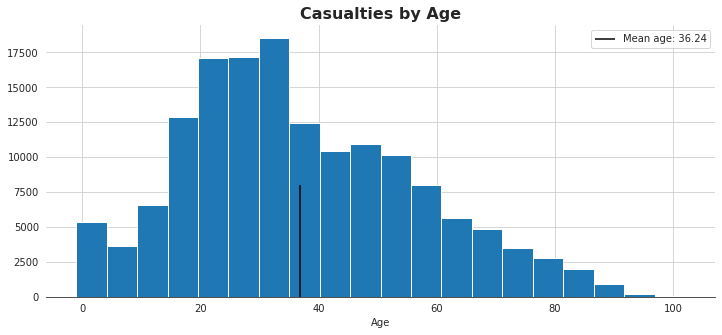

In [ ]:
Casualties_df.Age_of_Casualty.hist(bins=20, figsize=(12,5))
plt.title('Casualties by Age', fontsize=16, fontweight='bold')
plt.vlines(Casualties_df.Age_of_Casualty.mean(), ymin=0, ymax=8000, label='Mean age: 36.24')
plt.xlabel('Age')
plt.legend()
sns.despine(top=True, bottom=False, left=True, right=True);

The above histogram shows that majority of accident occurs among the youths of 30 - 40 years old and the average age of accident is 36.24

In [ ]:
# breaking the data into male and female
# 1 = Male, 2 = Female, -1 = missing data and will not be used
Casualties_df.Sex_of_Casualty.value_counts()

 1    91265
 2    61160
-1      733
Name: Sex_of_Casualty, dtype: int64

In [ ]:
male_casualties_age = Casualties_df[Casualties_df['Sex_of_Casualty']==1]['Age_of_Casualty']
female_casualties_age = Casualties_df[Casualties_df['Sex_of_Casualty']==2]['Age_of_Casualty']

print('male mean:', male_casualties_age.mean())
print('female mean:', female_casualties_age.mean())

male mean: 36.38204130827809
female mean: 38.1389306736429


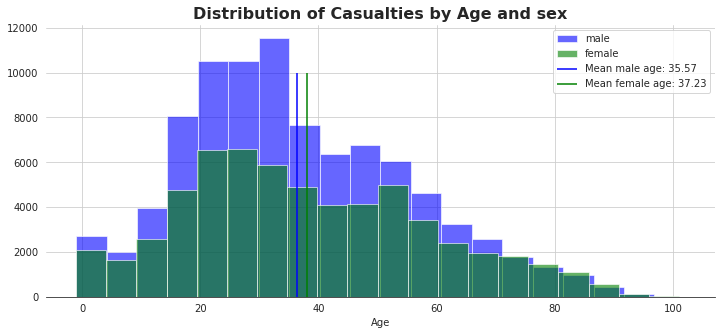

In [ ]:
# visualisng accident casualty based on male and female figures

male_casualties_age.hist(bins=20, color='BLUE', figsize=(12,5), label='male', alpha=0.6)
female_casualties_age.hist(bins=20, color='GREEN', figsize=(12,5), label='female', alpha=0.6)
plt.title('Distribution of Casualties by Age and sex', fontsize=16, fontweight='bold')
plt.vlines(male_casualties_age.mean(), ymin=0, ymax=10000, color='BLUE', label='Mean male age: 35.57')
plt.vlines(female_casualties_age.mean(), ymin=0, ymax=10000, color='GREEN', label='Mean female age: 37.23')
plt.xlabel('Age')
plt.legend()
sns.despine(top=True, bottom=False, left=True, right=True);

The above age distribution of accident shows that the average age of females casualties is greater than the one of male. I will use hypothesis testing to confirm if this difference has any statistical significance 

Null Hypothesis: The average age of male casualties in accidents is at least the same as the average age of female casualties in accidents.

 Ho : μm  >=   μf


Alternative Hypothesis: The average age of male casualties in accidents is less than the average age of female casualties in accidents.

 Hα : μm  <=   μf

 α = 0.5

In [ ]:
# Check to see if variance is the same between the samples
print('Variance Male:', np.var(male_casualties_age))
print('Variance Female:', np.var(female_casualties_age))

Variance Male: 356.8532993557583
Variance Female: 421.6524935589584


In [ ]:
# Since the variance for both samples are not the same,  I will set equal_var to False in order to run a Welche's t-test
# test will be a two sample t-test (one tail)
import scipy.stats as stats 
t_stat, p_val = stats.ttest_ind(male_casualties_age, female_casualties_age, equal_var=False, nan_policy='omit')
print('P-Value:', p_val/2)

P-Value: 2.5600274964553284e-64


The significance of this is that since the p value is less than 0.5 , we can reject the null hypothesis and accept the alternative hypothesis which is in confromity with the calculation above that average age of  male casualty is less than the average age of female casualty

Cohen's d can be used in order to measure the effect size or represent the differentiation between our two sample groups

In [ ]:
def Cohen_d(sample1, sample2):

    # Compute Cohen's d.

    diff = sample1.mean() - sample2.mean()

    n1, n2 = len(sample1), len(sample2)
    var1 = sample1.var()
    var2 = sample2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [ ]:
effect_size = Cohen_d(female_casualties_age, male_casualties_age)

print('The differentiation between the two sample groups is {}: '.format(effect_size))

The differentiation between the two sample groups is 0.08978939894497648: 


This shows that an effect is happening although very small and  that is why the hypothesis testing was able to catch it 

The same method above can be used to determine if their is a significant difference between male casualties and female casualties for serious accident

In [ ]:
# subsetting the column we want and filtering slight casualty severity 
male_serious_casualties = Casualties_df[Casualties_df['Sex_of_Casualty']==1][['Age_of_Casualty', 'Casualty_Severity']] # subsetting  the column we want 
male_serious_casualties = male_serious_casualties[male_serious_casualties['Casualty_Severity']!=3] # filtering off slight casualty for male 

female_serious_casualties = Casualties_df[Casualties_df['Sex_of_Casualty']==2][['Age_of_Casualty', 'Casualty_Severity']]
female_serious_casualties = female_serious_casualties[female_serious_casualties['Casualty_Severity']!=3] # filtering slight casualty for female 

male_serious_casualties = male_serious_casualties['Age_of_Casualty']
female_serious_casualties = female_serious_casualties['Age_of_Casualty']

In [ ]:
print('male mean:', male_serious_casualties.mean())
print('female mean:', female_serious_casualties.mean())


male mean: 38.52583298186419
female mean: 44.21434308663224


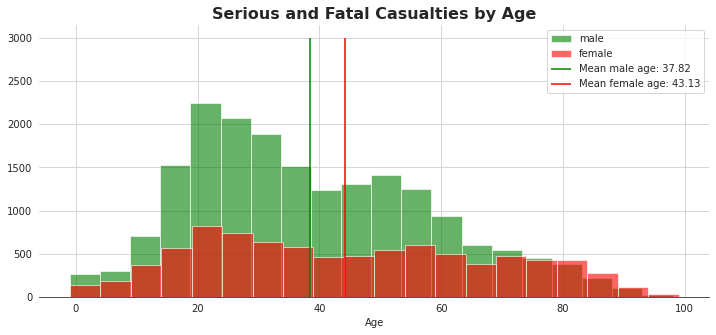

In [ ]:
male_serious_casualties.hist(bins=20, color='GREEN', figsize=(12,5), label='male', alpha=0.6)
female_serious_casualties.hist(bins=20, color='RED', figsize=(12,5), label='female', alpha=0.6)
plt.title('Serious and Fatal Casualties by Age', fontsize=16, fontweight='bold')
plt.vlines(male_serious_casualties.mean(), ymin=0, ymax=3000, color='GREEN', label='Mean male age: 37.82')
plt.vlines(female_serious_casualties.mean(), ymin=0, ymax=3000, color='RED', label='Mean female age: 43.13')
plt.xlabel('Age')
plt.legend()
sns.despine(top=True, bottom=False, left=True, right=True);

The above histogram also shows that the average age of females casualties is greater than the one of male.  We can also apply hypothesis testing to confirm if this difference has any statistical significance



Null Hypothesis: The average age of male casualties in accidents is at least the same as the average age of female casualties in accidents.

Ho : μm >= μf

Alternative Hypothesis: The average age of male casualties in accidents is less than the average age of female casualties in accidents.

Hα : μm <= μf

α = 0.5

In [ ]:
print('Variance Male:', np.var(male_serious_casualties))
print('Variance Female:', np.var(female_serious_casualties))

Variance Male: 391.1584427371882
Variance Female: 547.4595074141307


In [ ]:
# Since the variance for both samples are not the same, will set equal_var to False in order to run a Welche's t-test
# test will be a two sample t-test (one tail)
t_stat, p_val = stats.ttest_ind(male_serious_casualties, female_serious_casualties, equal_var=False, nan_policy='omit')
print('P-Value:', p_val/2)

P-Value: 1.59315184006883e-85


The significance of this is that since the p value is less than 0.5 , we can reject the null hypothesis and accept the alternative hypothesis with a 95% assurance that the average age of male casulties is ls less than the average age of female causalties since our α = 0.5

In [ ]:
effect_size = Cohen_d(female_serious_casualties, male_serious_casualties)

print('The differentiation between the two sample groups is {}: '.format(effect_size))

The differentiation between the two sample groups is 0.2710664679666957: 


WHAT AGE BAND OF DRIVER HAS THE MOST ACCIDENT

In [ ]:
Vehicles_df.Age_Band_of_Driver.value_counts()

 6     45993
 7     35341
 8     32281
-1     29756
 5     20568
 9     20344
 4     13947
 10     9848
 11     6169
 3      1727
 2       364
 1        43
Name: Age_Band_of_Driver, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


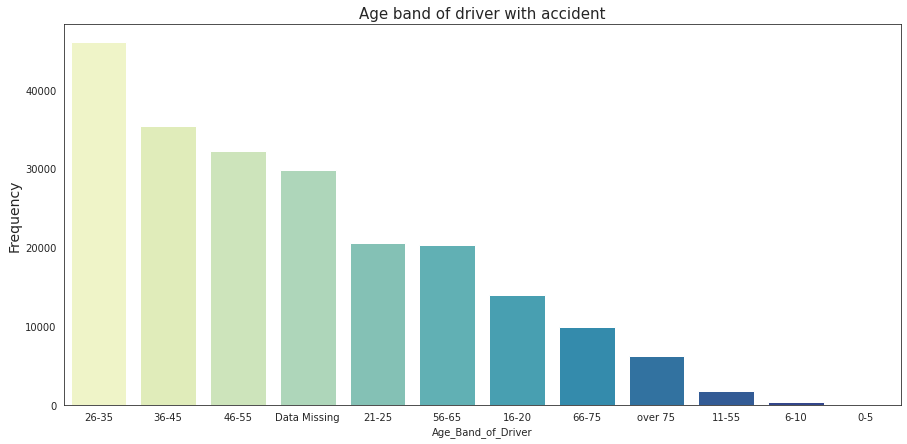

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot('Age_Band_of_Driver',data=Vehicles_df,
                 order = Vehicles_df.Age_Band_of_Driver.value_counts().index,palette = "YlGnBu") 
ax.set_xticklabels(['26-35','36-45',
                    '46-55',
                    'Data Missing',
                    '21-25','56-65','16-20','66-75','over 75','11-55','6-10','0-5'])
plt.title('Age band of driver with accident',fontsize=15)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

Age band of driver involved in accident based on sex 

Investigating the class of casualty

In [ ]:
Casualties_df["Casualty_Class"].value_counts()

1    99290
2    32098
3    21770
Name: Casualty_Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


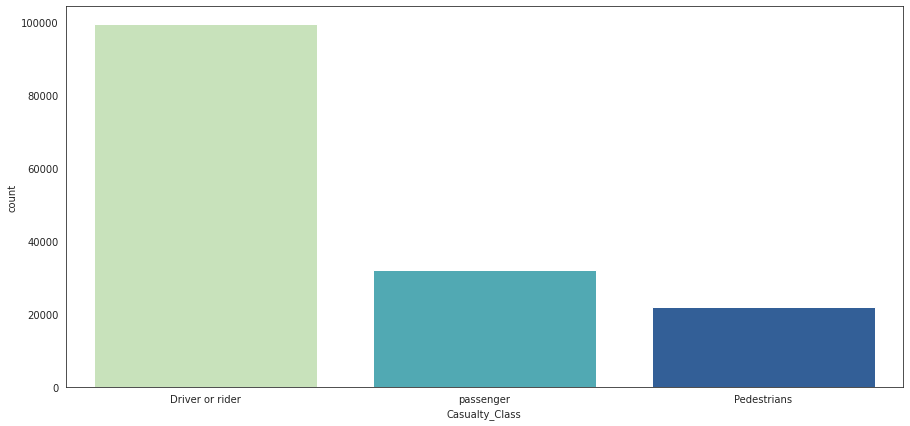

In [ ]:
plt.figure(figsize = (15,7))
ax=sns.countplot('Casualty_Class', data=Casualties_df, palette = "YlGnBu",order = Casualties_df["Casualty_Class"].value_counts().index)
ax.set_xticklabels(['Driver or rider','passenger','Pedestrians'])
plt.show()

Majority of casualty occurs in the category of driver or riders



Which Sex has the highest casualty ?

In [ ]:
Casualties_df['Sex_of_Casualty'].value_counts()

 1    91265
 2    61160
-1      733
Name: Sex_of_Casualty, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


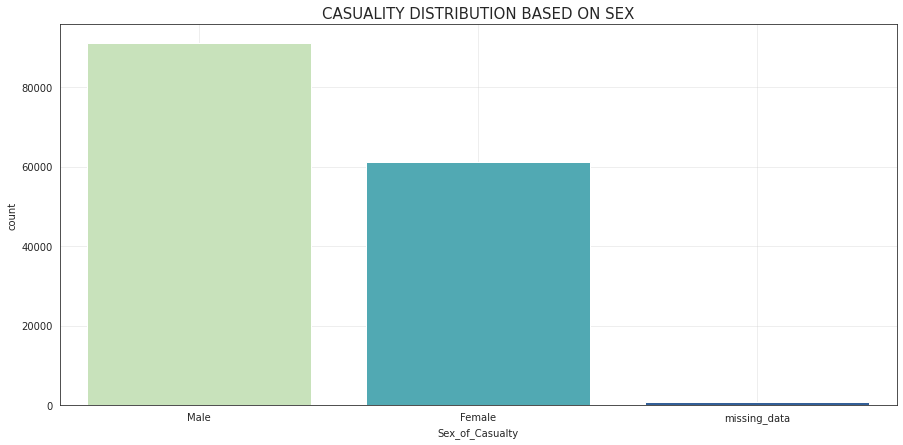

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(Casualties_df['Sex_of_Casualty'],order = Casualties_df['Sex_of_Casualty'].value_counts().index, palette = "YlGnBu")
plt.title('CASUALITY DISTRIBUTION BASED ON SEX', fontsize=15)
ax.set_xticklabels(['Male','Female','missing_data'])
plt.grid(alpha=0.4)

# PART I: BUILDING MY MODEL FOR PREDICTIONS 

I will use some columns to predict accidient severity

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
#importing the relevant packages.
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB





The following machine learning models will be stacked together for better performance in my prediction

1. Random Forest
2. Gaussian naive Bayes
3. Logistic Regression
4. KNeighborsClassifier

In [ ]:
# Joining Accident dataframe with vehicles dataframe to have all the predictors in one datafram
predictor_df=Accident_df.merge(Vehicles_df, on=['Accident_Index'], how='inner') # merging vehicle and accident datatframe

In [ ]:
predictor_df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,...,6,1,45,7,-1,-1,-1,4,1,4


In [ ]:
predictor_df = predictor_df.dropna()   # removing null values from the merged dataset
predictor_df.reset_index(drop=True)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,...,6,1,45,7,-1,-1,-1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,2019-05-30,...,1,1,20,4,2198,2,4,5,3,5
216377,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,2019-06-21,...,6,1,33,6,1997,2,12,3,2,3
216378,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,2019-06-21,...,6,1,61,9,2967,2,5,7,3,7
216379,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,2019-06-29,...,5,1,78,11,1597,2,6,8,3,8


#predicting Accident severity

In [ ]:
def get_models():
    models = dict()
    models['Random_forest'] = RandomForestClassifier()
    models['knn'] = KNeighborsClassifier()
    models['lr'] = LogisticRegression()
    models['bayes'] = GaussianNB()
    models['stacked'] = get_stacking()
    return models

In [ ]:
#setting things up
features = ['Weather_Conditions',
            'Speed_limit',
            'Road_Surface_Conditions',
            'Light_Conditions',
            'Age_of_Driver',
            'Journey_Purpose_of_Driver',
            'Sex_of_Driver',
            'Age_of_Vehicle',
            'Driver_Home_Area_Type,'
            'Vehicle_Manoeuvre']

target = ['Accident_Severity']


In [ ]:
predictor_df3 = predictor_df[['Weather_Conditions','Speed_limit','Road_Surface_Conditions',
'Light_Conditions','Age_of_Driver','Journey_Purpose_of_Driver','Sex_of_Driver','Age_of_Vehicle','Driver_Home_Area_Type','Accident_Severity','Vehicle_Manoeuvre']]


In [ ]:

needed_features = predictor_df3[(predictor_df3['Weather_Conditions']>0) & (predictor_df3['Speed_limit']>0) & (predictor_df3['Road_Surface_Conditions']>0) & (predictor_df3['Light_Conditions']>0)& (predictor_df3['Age_of_Driver']>0) & (predictor_df3['Journey_Purpose_of_Driver']>0) & (predictor_df3['Sex_of_Driver']>0) & (predictor_df3['Age_of_Vehicle']>0) & (predictor_df3['Driver_Home_Area_Type']>0)  & (predictor_df3['Vehicle_Manoeuvre']>0 ) & (predictor_df3['Accident_Severity'])>0] 

In [ ]:
y_target = needed_features["Accident_Severity"].values
Xfeatures = needed_features.drop("Accident_Severity", axis=1)

In [ ]:
def get_dataset():
    X_train, X_validation, y_train, y_validation = train_test_split(Xfeatures,y_target,test_size=.25,random_state=1)
    return X_train, y_train

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [ ]:
from sklearn.ensemble import StackingClassifier
def get_stacking():
    level0 = list()
    level0.append(('random', RandomForestClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    level0.append(('bayes', GaussianNB()))
    
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [ ]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>Random_forest 0.978 (0.001)
>knn 0.979 (0.000)
>lr 0.980 (0.000)
>bayes 0.973 (0.001)
>stacked 0.980 (0.000)


# predicting where accident will  happens using Vehicle_Manoeuvre

In [ ]:
def get_models():
    models = dict()
    models['Random_forest'] = DecisionTreeClassifier()
    models['knn'] = KNeighborsClassifier()
    models['lr'] = LogisticRegression()
    models['bayes'] = GaussianNB()
    models['stacked'] = get_stacking()
    return models

In [ ]:
features = ['Weather_Conditions',
            'Speed_limit',
            'Road_Surface_Conditions',
            'Light_Conditions',
            'Age_of_Driver',
            'Journey_Purpose_of_Driver',
            'Sex_of_Driver',
            'Driver_Home_Area_Type',
            'Accident_Severity']

target = ['Vehicle_Manoeuvre']

In [ ]:
predictor_df3 = predictor_df[['Weather_Conditions','Speed_limit','Road_Surface_Conditions',
'Light_Conditions','Age_of_Driver','Journey_Purpose_of_Driver','Sex_of_Driver','Driver_Home_Area_Type','Accident_Severity','Vehicle_Manoeuvre']]

In [ ]:
needed_features = predictor_df3[(predictor_df3['Weather_Conditions']>0) & (predictor_df3['Speed_limit']>0) & (predictor_df3['Road_Surface_Conditions']>0) & (predictor_df3['Light_Conditions']>0)& (predictor_df3['Age_of_Driver']>0) & (predictor_df3['Journey_Purpose_of_Driver']>0) & (predictor_df3['Sex_of_Driver']>0) & (predictor_df3['Driver_Home_Area_Type']>0)  & (predictor_df3['Vehicle_Manoeuvre']>0 ) & (predictor_df3['Accident_Severity'])>0] 

In [ ]:
y_target = needed_features["Vehicle_Manoeuvre"].values
Xfeatures = needed_features.drop("Vehicle_Manoeuvre", axis=1)

In [ ]:
def get_dataset():
    X_train, X_validation, y_train, y_validation = train_test_split(Xfeatures,y_target,test_size=.25,random_state=1)
    return X_train, y_train

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [ ]:
from sklearn.ensemble import StackingClassifier
def get_stacking():
    level0 = list()
    level0.append(('dst', DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    level0.append(('bayes', GaussianNB()))
    
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [ ]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>Random_forest 0.379 (0.004)
>knn 0.375 (0.004)
>lr 0.499 (0.000)
>bayes 0.474 (0.002)
>stacked 0.499 (0.000)


#predicting where accident will happen using junction location

In [ ]:
predictor_df3 = predictor_df[['Weather_Conditions','Speed_limit','Road_Surface_Conditions',
'Light_Conditions','Age_of_Driver','Journey_Purpose_of_Driver','Sex_of_Driver','Driver_Home_Area_Type','Accident_Severity','Junction_Location']]

In [ ]:
needed_features = predictor_df3[(predictor_df3['Weather_Conditions']>0) & (predictor_df3['Speed_limit']>0) & (predictor_df3['Road_Surface_Conditions']>0) & (predictor_df3['Light_Conditions']>0)& (predictor_df3['Age_of_Driver']>0) & (predictor_df3['Journey_Purpose_of_Driver']>0) & (predictor_df3['Sex_of_Driver']>0) & (predictor_df3['Driver_Home_Area_Type']>0)  & (predictor_df3['Junction_Location']>0 ) & (predictor_df3['Accident_Severity'])>0] 

In [ ]:
y_target = needed_features["Junction_Location"].values
Xfeatures = needed_features.drop("Junction_Location", axis=1)

In [ ]:
def get_dataset():
    X_train, X_validation, y_train, y_validation = train_test_split(Xfeatures,y_target,test_size=.25,random_state=1)
    return X_train, y_train

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [ ]:
from sklearn.ensemble import StackingClassifier
def get_stacking():
    level0 = list()
    level0.append(('dst', DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    level0.append(('bayes', GaussianNB()))
    
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [ ]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>Random_forest 0.345 (0.005)
>knn 0.353 (0.004)
>lr 0.411 (0.002)
>bayes 0.403 (0.004)
>stacked 0.411 (0.001)
